In [1]:
import os

os.getcwd()

'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Classification\\Haberman'

In [2]:
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Import classes and functions.

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# Load the Haberman Survival dataset.

dataset = np.loadtxt("Haberman-Survival-Data.txt", delimiter = ",")

# Split the data into input (X) and output (Y) variables.

X = dataset[:, 0:3]
Y = np.array(dataset[:, 3], dtype = int)

In [5]:
# Change the output label to 0 and 1.

Y_train = np.copy(Y)
index = np.where(Y_train == 2)
Y_train[index] = 0

#----------------------------------------
# Standardize the input data.

sample_mean = np.mean(X, axis = 0)
np.round(sample_mean, 4)

sample_std = np.std(X, axis = 0, ddof = 1)
np.round(sample_std, 4)

standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

np.round(np.mean(X_train, axis = 0), 4)
np.round(np.std(X_train, axis = 0, ddof = 1), 4)

array([1., 1., 1.])

In [6]:
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)

In [7]:
## Create DNN model

def create_DNN_model(nodes, drop, kernel, act):
  model = Sequential()
  # Build input_layer & first_hidden_layer
  if drop[0] > 0:
    model.add(Dropout(rate = drop[0], input_shape = (nodes[0], )))
    model.add(Dense(units = nodes[1], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  else:
    model.add(Dense(units = nodes[1], input_dim = nodes[0], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  # Build other_hidden_layer
  for i in range(2, len(nodes) - 1):
    model.add(Dense(units = nodes[i], kernel_initializer = kernel[i-1], activation =act[i-1]))
    if drop[i] > 0:
      model.add(Dropout(rate = drop[i]))
  # Build output_layer
  model.add(Dense(units = nodes[len(nodes)-1], kernel_initializer = kernel[len(kernel) - 1], activation = act[len(act) - 1]))
  return model

In [8]:
# Create the DNN_model

input_dim = X.shape[1]

nodes = [input_dim, 5, 6, 4, 1]
	# first component: number of input nodes
	# last component: number of output nodes

drop = [0, 0.1, 0.1, 0.1]
	# len(dropout_rate) = len(node) - 1
	# first component: dropout rate for the input layer
	# other components: dropout rates for the hidden layers
	# Dropout rate is not used in the output layer.

#dropout_rate = [0]*(len(node)-1)
#dropout_rate = [0] + [0.2]*(len(node)-2)

kernel = ['uniform', 'uniform', 'uniform', 'uniform']

act = ['relu', 'relu', 'relu', 'sigmoid']

#----------------------------------------
# 10-fold cross validation

cv_bc = []
cv_acc = []

for k in range(fold_num):
    # Build the model.
    model = create_DNN_model(nodes, drop, kernel, act)
    #model.summary()
    # Compile the model.
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit(X_train[train_index], Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 40, verbose = 2)
    # Evaluate the model.
    scores = model.evaluate(X_train[test_index], Y_train[test_index], verbose = 0)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_bc.append(scores[0])
    cv_acc.append(scores[1])

Train on 220 samples, validate on 55 samples
Epoch 1/1000
 - 1s - loss: 0.6926 - acc: 0.6182 - val_loss: 0.6916 - val_acc: 0.7818
Epoch 2/1000
 - 0s - loss: 0.6913 - acc: 0.7273 - val_loss: 0.6899 - val_acc: 0.7818
Epoch 3/1000
 - 0s - loss: 0.6901 - acc: 0.7273 - val_loss: 0.6883 - val_acc: 0.7818
Epoch 4/1000
 - 0s - loss: 0.6888 - acc: 0.7273 - val_loss: 0.6867 - val_acc: 0.7818
Epoch 5/1000
 - 0s - loss: 0.6875 - acc: 0.7273 - val_loss: 0.6852 - val_acc: 0.7818
Epoch 6/1000
 - 0s - loss: 0.6863 - acc: 0.7273 - val_loss: 0.6836 - val_acc: 0.7818
Epoch 7/1000
 - 0s - loss: 0.6850 - acc: 0.7273 - val_loss: 0.6821 - val_acc: 0.7818
Epoch 8/1000
 - 0s - loss: 0.6838 - acc: 0.7273 - val_loss: 0.6806 - val_acc: 0.7818
Epoch 9/1000
 - 0s - loss: 0.6826 - acc: 0.7273 - val_loss: 0.6791 - val_acc: 0.7818
Epoch 10/1000
 - 0s - loss: 0.6814 - acc: 0.7273 - val_loss: 0.6776 - val_acc: 0.7818
Epoch 11/1000
 - 0s - loss: 0.6802 - acc: 0.7273 - val_loss: 0.6761 - val_acc: 0.7818
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 0.6150 - acc: 0.7273 - val_loss: 0.5896 - val_acc: 0.7818
Epoch 97/1000
 - 0s - loss: 0.6145 - acc: 0.7273 - val_loss: 0.5890 - val_acc: 0.7818
Epoch 98/1000
 - 0s - loss: 0.6141 - acc: 0.7273 - val_loss: 0.5883 - val_acc: 0.7818
Epoch 99/1000
 - 0s - loss: 0.6137 - acc: 0.7273 - val_loss: 0.5876 - val_acc: 0.7818
Epoch 100/1000
 - 0s - loss: 0.6132 - acc: 0.7273 - val_loss: 0.5870 - val_acc: 0.7818
Epoch 101/1000
 - 0s - loss: 0.6129 - acc: 0.7273 - val_loss: 0.5864 - val_acc: 0.7818
Epoch 102/1000
 - 0s - loss: 0.6124 - acc: 0.7273 - val_loss: 0.5858 - val_acc: 0.7818
Epoch 103/1000
 - 0s - loss: 0.6120 - acc: 0.7273 - val_loss: 0.5852 - val_acc: 0.7818
Epoch 104/1000
 - 0s - loss: 0.6116 - acc: 0.7273 - val_loss: 0.5846 - val_acc: 0.7818
Epoch 105/1000
 - 0s - loss: 0.6112 - acc: 0.7273 - val_loss: 0.5840 - val_acc: 0.7818
Epoch 106/1000
 - 0s - loss: 0.6108 - acc: 0.7273 - val_loss: 0.5835 - val_acc: 0.7818
Epoch 107/1000
 - 0s - loss: 0.6104 - acc: 0.72

Epoch 191/1000
 - 0s - loss: 0.5918 - acc: 0.7273 - val_loss: 0.5512 - val_acc: 0.7818
Epoch 192/1000
 - 0s - loss: 0.5917 - acc: 0.7273 - val_loss: 0.5510 - val_acc: 0.7818
Epoch 193/1000
 - 0s - loss: 0.5916 - acc: 0.7273 - val_loss: 0.5507 - val_acc: 0.7818
Epoch 194/1000
 - 0s - loss: 0.5915 - acc: 0.7273 - val_loss: 0.5505 - val_acc: 0.7818
Epoch 195/1000
 - 0s - loss: 0.5914 - acc: 0.7273 - val_loss: 0.5502 - val_acc: 0.7818
Epoch 196/1000
 - 0s - loss: 0.5913 - acc: 0.7273 - val_loss: 0.5500 - val_acc: 0.7818
Epoch 197/1000
 - 0s - loss: 0.5911 - acc: 0.7273 - val_loss: 0.5498 - val_acc: 0.7818
Epoch 198/1000
 - 0s - loss: 0.5910 - acc: 0.7273 - val_loss: 0.5496 - val_acc: 0.7818
Epoch 199/1000
 - 0s - loss: 0.5910 - acc: 0.7273 - val_loss: 0.5493 - val_acc: 0.7818
Epoch 200/1000
 - 0s - loss: 0.5909 - acc: 0.7273 - val_loss: 0.5491 - val_acc: 0.7818
Epoch 201/1000
 - 0s - loss: 0.5907 - acc: 0.7273 - val_loss: 0.5489 - val_acc: 0.7818
Epoch 202/1000
 - 0s - loss: 0.5907 - acc: 

 - 0s - loss: 0.5868 - acc: 0.7273 - val_loss: 0.5379 - val_acc: 0.7818
Epoch 286/1000
 - 0s - loss: 0.5867 - acc: 0.7273 - val_loss: 0.5379 - val_acc: 0.7818
Epoch 287/1000
 - 0s - loss: 0.5867 - acc: 0.7273 - val_loss: 0.5378 - val_acc: 0.7818
Epoch 288/1000
 - 0s - loss: 0.5867 - acc: 0.7273 - val_loss: 0.5378 - val_acc: 0.7818
Epoch 289/1000
 - 0s - loss: 0.5867 - acc: 0.7273 - val_loss: 0.5377 - val_acc: 0.7818
Epoch 290/1000
 - 0s - loss: 0.5867 - acc: 0.7273 - val_loss: 0.5377 - val_acc: 0.7818
Epoch 291/1000
 - 0s - loss: 0.5866 - acc: 0.7273 - val_loss: 0.5377 - val_acc: 0.7818
Epoch 292/1000
 - 0s - loss: 0.5866 - acc: 0.7273 - val_loss: 0.5376 - val_acc: 0.7818
Epoch 293/1000
 - 0s - loss: 0.5866 - acc: 0.7273 - val_loss: 0.5375 - val_acc: 0.7818
Epoch 294/1000
 - 0s - loss: 0.5866 - acc: 0.7273 - val_loss: 0.5375 - val_acc: 0.7818
Epoch 295/1000
 - 0s - loss: 0.5866 - acc: 0.7273 - val_loss: 0.5374 - val_acc: 0.7818
Epoch 296/1000
 - 0s - loss: 0.5866 - acc: 0.7273 - val_lo

Epoch 380/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5342 - val_acc: 0.7818
Epoch 381/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5341 - val_acc: 0.7818
Epoch 382/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5341 - val_acc: 0.7818
Epoch 383/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5341 - val_acc: 0.7818
Epoch 384/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5341 - val_acc: 0.7818
Epoch 385/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5341 - val_acc: 0.7818
Epoch 386/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5341 - val_acc: 0.7818
Epoch 387/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5340 - val_acc: 0.7818
Epoch 388/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5340 - val_acc: 0.7818
Epoch 389/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5340 - val_acc: 0.7818
Epoch 390/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5340 - val_acc: 0.7818
Epoch 391/1000
 - 0s - loss: 0.5860 - acc: 

Epoch 475/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5328 - val_acc: 0.7818
Epoch 476/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5328 - val_acc: 0.7818
Epoch 477/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5328 - val_acc: 0.7818
Epoch 478/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5328 - val_acc: 0.7818
Epoch 479/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5327 - val_acc: 0.7818
Epoch 480/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5327 - val_acc: 0.7818
Epoch 481/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5327 - val_acc: 0.7818
Epoch 482/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5327 - val_acc: 0.7818
Epoch 483/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5327 - val_acc: 0.7818
Epoch 484/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 485/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 486/1000
 - 0s - loss: 0.5860 - acc: 

 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5323 - val_acc: 0.7818
Epoch 570/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 571/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 572/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 573/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 574/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 575/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 576/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 577/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 578/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 579/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 580/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_lo

Epoch 664/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 665/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 666/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 667/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 668/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 669/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 670/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 671/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 672/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 673/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 674/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 675/1000
 - 0s - loss: 0.5860 - acc: 

Epoch 759/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 760/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 761/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 762/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 763/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 764/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 765/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 766/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5327 - val_acc: 0.7818
Epoch 767/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 768/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5326 - val_acc: 0.7818
Epoch 769/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5327 - val_acc: 0.7818
Epoch 770/1000
 - 0s - loss: 0.5860 - acc: 

Epoch 854/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 855/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 856/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 857/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 858/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 859/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 860/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 861/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 862/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 863/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 864/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 865/1000
 - 0s - loss: 0.5860 - acc: 

 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 949/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 950/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 951/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 952/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 953/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 954/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 955/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 956/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 957/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 958/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_loss: 0.5324 - val_acc: 0.7818
Epoch 959/1000
 - 0s - loss: 0.5860 - acc: 0.7273 - val_lo

Epoch 43/1000
 - 0s - loss: 0.5768 - acc: 0.7273 - val_loss: 0.4906 - val_acc: 0.7818
Epoch 44/1000
 - 0s - loss: 0.5733 - acc: 0.7273 - val_loss: 0.4918 - val_acc: 0.7818
Epoch 45/1000
 - 0s - loss: 0.5702 - acc: 0.7273 - val_loss: 0.4920 - val_acc: 0.7818
Epoch 46/1000
 - 0s - loss: 0.5631 - acc: 0.7273 - val_loss: 0.4911 - val_acc: 0.7818
Epoch 47/1000
 - 0s - loss: 0.5752 - acc: 0.7273 - val_loss: 0.4915 - val_acc: 0.7818
Epoch 48/1000
 - 0s - loss: 0.5622 - acc: 0.7273 - val_loss: 0.4917 - val_acc: 0.7818
Epoch 49/1000
 - 0s - loss: 0.5689 - acc: 0.7273 - val_loss: 0.4912 - val_acc: 0.7818
Epoch 50/1000
 - 0s - loss: 0.5747 - acc: 0.7273 - val_loss: 0.4920 - val_acc: 0.7818
Epoch 51/1000
 - 0s - loss: 0.5559 - acc: 0.7273 - val_loss: 0.4901 - val_acc: 0.7818
Epoch 52/1000
 - 0s - loss: 0.5773 - acc: 0.7273 - val_loss: 0.4892 - val_acc: 0.7818
Epoch 53/1000
 - 0s - loss: 0.5609 - acc: 0.7273 - val_loss: 0.4884 - val_acc: 0.7818
Epoch 54/1000
 - 0s - loss: 0.5652 - acc: 0.7273 - val

Epoch 138/1000
 - 0s - loss: 0.5750 - acc: 0.7273 - val_loss: 0.4679 - val_acc: 0.7818
Epoch 139/1000
 - 0s - loss: 0.5487 - acc: 0.7273 - val_loss: 0.4671 - val_acc: 0.7818
Epoch 140/1000
 - 0s - loss: 0.5783 - acc: 0.7273 - val_loss: 0.4674 - val_acc: 0.7818
Epoch 141/1000
 - 0s - loss: 0.5448 - acc: 0.7273 - val_loss: 0.4671 - val_acc: 0.7818
Epoch 142/1000
 - 0s - loss: 0.5581 - acc: 0.7273 - val_loss: 0.4678 - val_acc: 0.7818
Epoch 143/1000
 - 0s - loss: 0.5645 - acc: 0.7273 - val_loss: 0.4691 - val_acc: 0.7818
Epoch 144/1000
 - 0s - loss: 0.5524 - acc: 0.7273 - val_loss: 0.4694 - val_acc: 0.7818
Epoch 145/1000
 - 0s - loss: 0.5582 - acc: 0.7273 - val_loss: 0.4694 - val_acc: 0.7818
Epoch 146/1000
 - 0s - loss: 0.5695 - acc: 0.7273 - val_loss: 0.4691 - val_acc: 0.7818
Epoch 147/1000
 - 0s - loss: 0.5609 - acc: 0.7273 - val_loss: 0.4697 - val_acc: 0.7818
Epoch 148/1000
 - 0s - loss: 0.5558 - acc: 0.7273 - val_loss: 0.4706 - val_acc: 0.7818
Epoch 149/1000
 - 0s - loss: 0.5563 - acc: 

 - 0s - loss: 0.5506 - acc: 0.7273 - val_loss: 0.4594 - val_acc: 0.7818
Epoch 233/1000
 - 0s - loss: 0.5560 - acc: 0.7273 - val_loss: 0.4588 - val_acc: 0.7818
Epoch 234/1000
 - 0s - loss: 0.5582 - acc: 0.7273 - val_loss: 0.4586 - val_acc: 0.7818
Epoch 235/1000
 - 0s - loss: 0.5574 - acc: 0.7273 - val_loss: 0.4592 - val_acc: 0.7818
Epoch 236/1000
 - 0s - loss: 0.5529 - acc: 0.7273 - val_loss: 0.4587 - val_acc: 0.7818
Epoch 237/1000
 - 0s - loss: 0.5500 - acc: 0.7273 - val_loss: 0.4593 - val_acc: 0.7818
Epoch 238/1000
 - 0s - loss: 0.5354 - acc: 0.7273 - val_loss: 0.4585 - val_acc: 0.7818
Epoch 239/1000
 - 0s - loss: 0.5489 - acc: 0.7273 - val_loss: 0.4563 - val_acc: 0.7818
Epoch 240/1000
 - 0s - loss: 0.5392 - acc: 0.7273 - val_loss: 0.4546 - val_acc: 0.7818
Epoch 241/1000
 - 0s - loss: 0.5592 - acc: 0.7273 - val_loss: 0.4549 - val_acc: 0.7818
Epoch 242/1000
 - 0s - loss: 0.5614 - acc: 0.7273 - val_loss: 0.4562 - val_acc: 0.7818
Epoch 243/1000
 - 0s - loss: 0.5608 - acc: 0.7273 - val_lo

Epoch 327/1000
 - 0s - loss: 0.5447 - acc: 0.7273 - val_loss: 0.4598 - val_acc: 0.7818
Epoch 328/1000
 - 0s - loss: 0.5466 - acc: 0.7273 - val_loss: 0.4583 - val_acc: 0.7818
Epoch 329/1000
 - 0s - loss: 0.5571 - acc: 0.7273 - val_loss: 0.4570 - val_acc: 0.7818
Epoch 330/1000
 - 0s - loss: 0.5327 - acc: 0.7273 - val_loss: 0.4558 - val_acc: 0.7818
Epoch 331/1000
 - 0s - loss: 0.5515 - acc: 0.7273 - val_loss: 0.4551 - val_acc: 0.7818
Epoch 332/1000
 - 0s - loss: 0.5468 - acc: 0.7273 - val_loss: 0.4545 - val_acc: 0.7818
Epoch 333/1000
 - 0s - loss: 0.5574 - acc: 0.7273 - val_loss: 0.4553 - val_acc: 0.7818
Epoch 334/1000
 - 0s - loss: 0.5599 - acc: 0.7273 - val_loss: 0.4562 - val_acc: 0.7818
Epoch 335/1000
 - 0s - loss: 0.5630 - acc: 0.7273 - val_loss: 0.4571 - val_acc: 0.7818
Epoch 336/1000
 - 0s - loss: 0.5458 - acc: 0.7273 - val_loss: 0.4572 - val_acc: 0.7818
Epoch 337/1000
 - 0s - loss: 0.5506 - acc: 0.7273 - val_loss: 0.4571 - val_acc: 0.7818
Epoch 338/1000
 - 0s - loss: 0.5503 - acc: 

 - 0s - loss: 0.5507 - acc: 0.7273 - val_loss: 0.4501 - val_acc: 0.7818
Epoch 422/1000
 - 0s - loss: 0.5638 - acc: 0.7273 - val_loss: 0.4512 - val_acc: 0.7818
Epoch 423/1000
 - 0s - loss: 0.5578 - acc: 0.7273 - val_loss: 0.4516 - val_acc: 0.7818
Epoch 424/1000
 - 0s - loss: 0.5674 - acc: 0.7273 - val_loss: 0.4534 - val_acc: 0.7818
Epoch 425/1000
 - 0s - loss: 0.5582 - acc: 0.7273 - val_loss: 0.4557 - val_acc: 0.7818
Epoch 426/1000
 - 0s - loss: 0.5482 - acc: 0.7273 - val_loss: 0.4572 - val_acc: 0.7818
Epoch 427/1000
 - 0s - loss: 0.5508 - acc: 0.7273 - val_loss: 0.4591 - val_acc: 0.7818
Epoch 428/1000
 - 0s - loss: 0.5424 - acc: 0.7273 - val_loss: 0.4588 - val_acc: 0.7818
Epoch 429/1000
 - 0s - loss: 0.5560 - acc: 0.7273 - val_loss: 0.4584 - val_acc: 0.7818
Epoch 430/1000
 - 0s - loss: 0.5410 - acc: 0.7273 - val_loss: 0.4581 - val_acc: 0.7818
Epoch 431/1000
 - 0s - loss: 0.5554 - acc: 0.7273 - val_loss: 0.4590 - val_acc: 0.7818
Epoch 432/1000
 - 0s - loss: 0.5642 - acc: 0.7273 - val_lo

Epoch 516/1000
 - 0s - loss: 0.5584 - acc: 0.7273 - val_loss: 0.4586 - val_acc: 0.7818
Epoch 517/1000
 - 0s - loss: 0.5501 - acc: 0.7273 - val_loss: 0.4579 - val_acc: 0.7818
Epoch 518/1000
 - 0s - loss: 0.5709 - acc: 0.7273 - val_loss: 0.4586 - val_acc: 0.7818
Epoch 519/1000
 - 0s - loss: 0.5513 - acc: 0.7273 - val_loss: 0.4597 - val_acc: 0.7818
Epoch 520/1000
 - 0s - loss: 0.5469 - acc: 0.7273 - val_loss: 0.4591 - val_acc: 0.7818
Epoch 521/1000
 - 0s - loss: 0.5521 - acc: 0.7273 - val_loss: 0.4580 - val_acc: 0.7818
Epoch 522/1000
 - 0s - loss: 0.5482 - acc: 0.7273 - val_loss: 0.4569 - val_acc: 0.7818
Epoch 523/1000
 - 0s - loss: 0.5419 - acc: 0.7273 - val_loss: 0.4549 - val_acc: 0.7818
Epoch 524/1000
 - 0s - loss: 0.5518 - acc: 0.7273 - val_loss: 0.4519 - val_acc: 0.7818
Epoch 525/1000
 - 0s - loss: 0.5698 - acc: 0.7273 - val_loss: 0.4529 - val_acc: 0.7818
Epoch 526/1000
 - 0s - loss: 0.5413 - acc: 0.7273 - val_loss: 0.4528 - val_acc: 0.7818
Epoch 527/1000
 - 0s - loss: 0.5489 - acc: 

Epoch 611/1000
 - 0s - loss: 0.5575 - acc: 0.7273 - val_loss: 0.4555 - val_acc: 0.7818
Epoch 612/1000
 - 0s - loss: 0.5562 - acc: 0.7273 - val_loss: 0.4560 - val_acc: 0.7818
Epoch 613/1000
 - 0s - loss: 0.5598 - acc: 0.7273 - val_loss: 0.4563 - val_acc: 0.7818
Epoch 614/1000
 - 0s - loss: 0.5442 - acc: 0.7273 - val_loss: 0.4569 - val_acc: 0.7818
Epoch 615/1000
 - 0s - loss: 0.5654 - acc: 0.7273 - val_loss: 0.4565 - val_acc: 0.7818
Epoch 616/1000
 - 0s - loss: 0.5487 - acc: 0.7273 - val_loss: 0.4574 - val_acc: 0.7818
Epoch 617/1000
 - 0s - loss: 0.5487 - acc: 0.7273 - val_loss: 0.4572 - val_acc: 0.7818
Epoch 618/1000
 - 0s - loss: 0.5416 - acc: 0.7273 - val_loss: 0.4563 - val_acc: 0.7818
Epoch 619/1000
 - 0s - loss: 0.5485 - acc: 0.7273 - val_loss: 0.4551 - val_acc: 0.7818
Epoch 620/1000
 - 0s - loss: 0.5508 - acc: 0.7273 - val_loss: 0.4542 - val_acc: 0.7818
Epoch 621/1000
 - 0s - loss: 0.5503 - acc: 0.7273 - val_loss: 0.4538 - val_acc: 0.7818
Epoch 622/1000
 - 0s - loss: 0.5467 - acc: 

 - 0s - loss: 0.5461 - acc: 0.7273 - val_loss: 0.4553 - val_acc: 0.7818
Epoch 706/1000
 - 0s - loss: 0.5454 - acc: 0.7273 - val_loss: 0.4538 - val_acc: 0.7818
Epoch 707/1000
 - 0s - loss: 0.5520 - acc: 0.7273 - val_loss: 0.4540 - val_acc: 0.7818
Epoch 708/1000
 - 0s - loss: 0.5564 - acc: 0.7273 - val_loss: 0.4551 - val_acc: 0.7818
Epoch 709/1000
 - 0s - loss: 0.5373 - acc: 0.7273 - val_loss: 0.4552 - val_acc: 0.7818
Epoch 710/1000
 - 0s - loss: 0.5694 - acc: 0.7273 - val_loss: 0.4555 - val_acc: 0.7818
Epoch 711/1000
 - 0s - loss: 0.5622 - acc: 0.7273 - val_loss: 0.4582 - val_acc: 0.7818
Epoch 712/1000
 - 0s - loss: 0.5597 - acc: 0.7273 - val_loss: 0.4610 - val_acc: 0.7818
Epoch 713/1000
 - 0s - loss: 0.5552 - acc: 0.7273 - val_loss: 0.4614 - val_acc: 0.7818
Epoch 714/1000
 - 0s - loss: 0.5547 - acc: 0.7273 - val_loss: 0.4610 - val_acc: 0.7818
Epoch 715/1000
 - 0s - loss: 0.5435 - acc: 0.7273 - val_loss: 0.4608 - val_acc: 0.7818
Epoch 716/1000
 - 0s - loss: 0.5500 - acc: 0.7273 - val_lo

Epoch 800/1000
 - 0s - loss: 0.5462 - acc: 0.7273 - val_loss: 0.4494 - val_acc: 0.7818
Epoch 801/1000
 - 0s - loss: 0.5532 - acc: 0.7273 - val_loss: 0.4516 - val_acc: 0.7818
Epoch 802/1000
 - 0s - loss: 0.5428 - acc: 0.7273 - val_loss: 0.4523 - val_acc: 0.7818
Epoch 803/1000
 - 0s - loss: 0.5382 - acc: 0.7273 - val_loss: 0.4531 - val_acc: 0.7818
Epoch 804/1000
 - 0s - loss: 0.5594 - acc: 0.7273 - val_loss: 0.4534 - val_acc: 0.7818
Epoch 805/1000
 - 0s - loss: 0.5485 - acc: 0.7273 - val_loss: 0.4526 - val_acc: 0.7818
Epoch 806/1000
 - 0s - loss: 0.5577 - acc: 0.7273 - val_loss: 0.4521 - val_acc: 0.7818
Epoch 807/1000
 - 0s - loss: 0.5640 - acc: 0.7273 - val_loss: 0.4522 - val_acc: 0.7818
Epoch 808/1000
 - 0s - loss: 0.5580 - acc: 0.7273 - val_loss: 0.4530 - val_acc: 0.7818
Epoch 809/1000
 - 0s - loss: 0.5562 - acc: 0.7273 - val_loss: 0.4526 - val_acc: 0.7818
Epoch 810/1000
 - 0s - loss: 0.5460 - acc: 0.7273 - val_loss: 0.4524 - val_acc: 0.7818
Epoch 811/1000
 - 0s - loss: 0.5580 - acc: 

Epoch 895/1000
 - 0s - loss: 0.5503 - acc: 0.7273 - val_loss: 0.4498 - val_acc: 0.7818
Epoch 896/1000
 - 0s - loss: 0.5437 - acc: 0.7273 - val_loss: 0.4494 - val_acc: 0.7818
Epoch 897/1000
 - 0s - loss: 0.5455 - acc: 0.7273 - val_loss: 0.4487 - val_acc: 0.7818
Epoch 898/1000
 - 0s - loss: 0.5482 - acc: 0.7273 - val_loss: 0.4478 - val_acc: 0.7818
Epoch 899/1000
 - 0s - loss: 0.5547 - acc: 0.7273 - val_loss: 0.4471 - val_acc: 0.7818
Epoch 900/1000
 - 0s - loss: 0.5441 - acc: 0.7273 - val_loss: 0.4462 - val_acc: 0.7818
Epoch 901/1000
 - 0s - loss: 0.5547 - acc: 0.7273 - val_loss: 0.4472 - val_acc: 0.7818
Epoch 902/1000
 - 0s - loss: 0.5576 - acc: 0.7273 - val_loss: 0.4478 - val_acc: 0.7818
Epoch 903/1000
 - 0s - loss: 0.5400 - acc: 0.7273 - val_loss: 0.4489 - val_acc: 0.7818
Epoch 904/1000
 - 0s - loss: 0.5562 - acc: 0.7273 - val_loss: 0.4486 - val_acc: 0.7818
Epoch 905/1000
 - 0s - loss: 0.5524 - acc: 0.7273 - val_loss: 0.4490 - val_acc: 0.7818
Epoch 906/1000
 - 0s - loss: 0.5491 - acc: 

 - 0s - loss: 0.5729 - acc: 0.7273 - val_loss: 0.4498 - val_acc: 0.7818
Epoch 990/1000
 - 0s - loss: 0.5580 - acc: 0.7273 - val_loss: 0.4513 - val_acc: 0.7818
Epoch 991/1000
 - 0s - loss: 0.5503 - acc: 0.7273 - val_loss: 0.4515 - val_acc: 0.7818
Epoch 992/1000
 - 0s - loss: 0.5403 - acc: 0.7273 - val_loss: 0.4502 - val_acc: 0.7818
Epoch 993/1000
 - 0s - loss: 0.5433 - acc: 0.7273 - val_loss: 0.4486 - val_acc: 0.7818
Epoch 994/1000
 - 0s - loss: 0.5542 - acc: 0.7273 - val_loss: 0.4466 - val_acc: 0.7818
Epoch 995/1000
 - 0s - loss: 0.5530 - acc: 0.7273 - val_loss: 0.4467 - val_acc: 0.7818
Epoch 996/1000
 - 0s - loss: 0.5399 - acc: 0.7273 - val_loss: 0.4455 - val_acc: 0.7818
Epoch 997/1000
 - 0s - loss: 0.5491 - acc: 0.7273 - val_loss: 0.4467 - val_acc: 0.7818
Epoch 998/1000
 - 0s - loss: 0.5412 - acc: 0.7273 - val_loss: 0.4456 - val_acc: 0.7818
Epoch 999/1000
 - 0s - loss: 0.5431 - acc: 0.7273 - val_loss: 0.4452 - val_acc: 0.7818
Epoch 1000/1000
 - 0s - loss: 0.5511 - acc: 0.7273 - val_l

Epoch 84/1000
 - 0s - loss: 0.5471 - acc: 0.7182 - val_loss: 0.4635 - val_acc: 0.7818
Epoch 85/1000
 - 0s - loss: 0.5538 - acc: 0.7182 - val_loss: 0.4623 - val_acc: 0.7818
Epoch 86/1000
 - 0s - loss: 0.5630 - acc: 0.7182 - val_loss: 0.4608 - val_acc: 0.7818
Epoch 87/1000
 - 0s - loss: 0.5658 - acc: 0.7182 - val_loss: 0.4599 - val_acc: 0.7818
Epoch 88/1000
 - 0s - loss: 0.5686 - acc: 0.7182 - val_loss: 0.4601 - val_acc: 0.7818
Epoch 89/1000
 - 0s - loss: 0.5687 - acc: 0.7182 - val_loss: 0.4604 - val_acc: 0.7818
Epoch 90/1000
 - 0s - loss: 0.5698 - acc: 0.7182 - val_loss: 0.4619 - val_acc: 0.7818
Epoch 91/1000
 - 0s - loss: 0.5656 - acc: 0.7182 - val_loss: 0.4630 - val_acc: 0.7818
Epoch 92/1000
 - 0s - loss: 0.5563 - acc: 0.7182 - val_loss: 0.4640 - val_acc: 0.7818
Epoch 93/1000
 - 0s - loss: 0.5704 - acc: 0.7182 - val_loss: 0.4645 - val_acc: 0.7818
Epoch 94/1000
 - 0s - loss: 0.5678 - acc: 0.7182 - val_loss: 0.4645 - val_acc: 0.7818
Epoch 95/1000
 - 0s - loss: 0.5637 - acc: 0.7182 - val

Epoch 179/1000
 - 0s - loss: 0.5522 - acc: 0.7182 - val_loss: 0.4640 - val_acc: 0.7818
Epoch 180/1000
 - 0s - loss: 0.5710 - acc: 0.7182 - val_loss: 0.4640 - val_acc: 0.7818
Epoch 181/1000
 - 0s - loss: 0.5501 - acc: 0.7182 - val_loss: 0.4626 - val_acc: 0.7818
Epoch 182/1000
 - 0s - loss: 0.5663 - acc: 0.7182 - val_loss: 0.4619 - val_acc: 0.7818
Epoch 183/1000
 - 0s - loss: 0.5384 - acc: 0.7182 - val_loss: 0.4606 - val_acc: 0.7818
Epoch 184/1000
 - 0s - loss: 0.5425 - acc: 0.7182 - val_loss: 0.4597 - val_acc: 0.7818
Epoch 185/1000
 - 0s - loss: 0.5483 - acc: 0.7182 - val_loss: 0.4576 - val_acc: 0.7818
Epoch 186/1000
 - 0s - loss: 0.5492 - acc: 0.7182 - val_loss: 0.4565 - val_acc: 0.7818
Epoch 187/1000
 - 0s - loss: 0.5648 - acc: 0.7182 - val_loss: 0.4567 - val_acc: 0.7818
Epoch 188/1000
 - 0s - loss: 0.5467 - acc: 0.7182 - val_loss: 0.4560 - val_acc: 0.7818
Epoch 189/1000
 - 0s - loss: 0.5333 - acc: 0.7182 - val_loss: 0.4556 - val_acc: 0.7818
Epoch 190/1000
 - 0s - loss: 0.5437 - acc: 

 - 0s - loss: 0.5466 - acc: 0.7182 - val_loss: 0.4471 - val_acc: 0.7818
Epoch 274/1000
 - 0s - loss: 0.5533 - acc: 0.7182 - val_loss: 0.4463 - val_acc: 0.7818
Epoch 275/1000
 - 0s - loss: 0.5551 - acc: 0.7182 - val_loss: 0.4454 - val_acc: 0.7818
Epoch 276/1000
 - 0s - loss: 0.5386 - acc: 0.7182 - val_loss: 0.4447 - val_acc: 0.7818
Epoch 277/1000
 - 0s - loss: 0.5507 - acc: 0.7182 - val_loss: 0.4452 - val_acc: 0.7818
Epoch 278/1000
 - 0s - loss: 0.5383 - acc: 0.7182 - val_loss: 0.4459 - val_acc: 0.7818
Epoch 279/1000
 - 0s - loss: 0.5389 - acc: 0.7182 - val_loss: 0.4455 - val_acc: 0.7818
Epoch 280/1000
 - 0s - loss: 0.5476 - acc: 0.7182 - val_loss: 0.4442 - val_acc: 0.7818
Epoch 281/1000
 - 0s - loss: 0.5556 - acc: 0.7182 - val_loss: 0.4426 - val_acc: 0.7818
Epoch 282/1000
 - 0s - loss: 0.5500 - acc: 0.7182 - val_loss: 0.4430 - val_acc: 0.7818
Epoch 283/1000
 - 0s - loss: 0.5509 - acc: 0.7182 - val_loss: 0.4429 - val_acc: 0.7818
Epoch 284/1000
 - 0s - loss: 0.5522 - acc: 0.7182 - val_lo

Epoch 368/1000
 - 0s - loss: 0.5445 - acc: 0.7182 - val_loss: 0.4369 - val_acc: 0.7818
Epoch 369/1000
 - 0s - loss: 0.5607 - acc: 0.7182 - val_loss: 0.4376 - val_acc: 0.7818
Epoch 370/1000
 - 0s - loss: 0.5492 - acc: 0.7182 - val_loss: 0.4394 - val_acc: 0.7818
Epoch 371/1000
 - 0s - loss: 0.5625 - acc: 0.7182 - val_loss: 0.4407 - val_acc: 0.7818
Epoch 372/1000
 - 0s - loss: 0.5540 - acc: 0.7182 - val_loss: 0.4411 - val_acc: 0.7818
Epoch 373/1000
 - 0s - loss: 0.5429 - acc: 0.7182 - val_loss: 0.4408 - val_acc: 0.7818
Epoch 374/1000
 - 0s - loss: 0.5429 - acc: 0.7182 - val_loss: 0.4407 - val_acc: 0.7818
Epoch 375/1000
 - 0s - loss: 0.5418 - acc: 0.7182 - val_loss: 0.4402 - val_acc: 0.7818
Epoch 376/1000
 - 0s - loss: 0.5382 - acc: 0.7182 - val_loss: 0.4394 - val_acc: 0.7818
Epoch 377/1000
 - 0s - loss: 0.5269 - acc: 0.7182 - val_loss: 0.4380 - val_acc: 0.7818
Epoch 378/1000
 - 0s - loss: 0.5489 - acc: 0.7182 - val_loss: 0.4371 - val_acc: 0.7818
Epoch 379/1000
 - 0s - loss: 0.5608 - acc: 

 - 0s - loss: 0.5378 - acc: 0.7182 - val_loss: 0.4363 - val_acc: 0.7818
Epoch 463/1000
 - 0s - loss: 0.5381 - acc: 0.7182 - val_loss: 0.4359 - val_acc: 0.7818
Epoch 464/1000
 - 0s - loss: 0.5479 - acc: 0.7182 - val_loss: 0.4350 - val_acc: 0.7818
Epoch 465/1000
 - 0s - loss: 0.5494 - acc: 0.7182 - val_loss: 0.4350 - val_acc: 0.7818
Epoch 466/1000
 - 0s - loss: 0.5433 - acc: 0.7182 - val_loss: 0.4344 - val_acc: 0.7818
Epoch 467/1000
 - 0s - loss: 0.5463 - acc: 0.7182 - val_loss: 0.4339 - val_acc: 0.7818
Epoch 468/1000
 - 0s - loss: 0.5332 - acc: 0.7182 - val_loss: 0.4347 - val_acc: 0.7818
Epoch 469/1000
 - 0s - loss: 0.5572 - acc: 0.7182 - val_loss: 0.4357 - val_acc: 0.7818
Epoch 470/1000
 - 0s - loss: 0.5175 - acc: 0.7182 - val_loss: 0.4353 - val_acc: 0.7818
Epoch 471/1000
 - 0s - loss: 0.5394 - acc: 0.7182 - val_loss: 0.4345 - val_acc: 0.7818
Epoch 472/1000
 - 0s - loss: 0.5466 - acc: 0.7182 - val_loss: 0.4351 - val_acc: 0.7818
Epoch 473/1000
 - 0s - loss: 0.5426 - acc: 0.7182 - val_lo

Epoch 557/1000
 - 0s - loss: 0.5517 - acc: 0.7182 - val_loss: 0.4355 - val_acc: 0.7818
Epoch 558/1000
 - 0s - loss: 0.5372 - acc: 0.7182 - val_loss: 0.4362 - val_acc: 0.7818
Epoch 559/1000
 - 0s - loss: 0.5482 - acc: 0.7182 - val_loss: 0.4370 - val_acc: 0.7818
Epoch 560/1000
 - 0s - loss: 0.5399 - acc: 0.7182 - val_loss: 0.4373 - val_acc: 0.7818
Epoch 561/1000
 - 0s - loss: 0.5350 - acc: 0.7182 - val_loss: 0.4377 - val_acc: 0.7818
Epoch 562/1000
 - 0s - loss: 0.5339 - acc: 0.7182 - val_loss: 0.4382 - val_acc: 0.7818
Epoch 563/1000
 - 0s - loss: 0.5321 - acc: 0.7182 - val_loss: 0.4369 - val_acc: 0.7818
Epoch 564/1000
 - 0s - loss: 0.5495 - acc: 0.7182 - val_loss: 0.4356 - val_acc: 0.7818
Epoch 565/1000
 - 0s - loss: 0.5381 - acc: 0.7182 - val_loss: 0.4346 - val_acc: 0.7818
Epoch 566/1000
 - 0s - loss: 0.5654 - acc: 0.7182 - val_loss: 0.4347 - val_acc: 0.7818
Epoch 567/1000
 - 0s - loss: 0.5469 - acc: 0.7182 - val_loss: 0.4355 - val_acc: 0.7818
Epoch 568/1000
 - 0s - loss: 0.5442 - acc: 

Epoch 652/1000
 - 0s - loss: 0.5370 - acc: 0.7182 - val_loss: 0.4323 - val_acc: 0.7818
Epoch 653/1000
 - 0s - loss: 0.5522 - acc: 0.7182 - val_loss: 0.4323 - val_acc: 0.7818
Epoch 654/1000
 - 0s - loss: 0.5430 - acc: 0.7182 - val_loss: 0.4326 - val_acc: 0.7818
Epoch 655/1000
 - 0s - loss: 0.5118 - acc: 0.7182 - val_loss: 0.4323 - val_acc: 0.7818
Epoch 656/1000
 - 0s - loss: 0.5346 - acc: 0.7182 - val_loss: 0.4316 - val_acc: 0.7818
Epoch 657/1000
 - 0s - loss: 0.5362 - acc: 0.7182 - val_loss: 0.4317 - val_acc: 0.7818
Epoch 658/1000
 - 0s - loss: 0.5628 - acc: 0.7182 - val_loss: 0.4328 - val_acc: 0.7818
Epoch 659/1000
 - 0s - loss: 0.5406 - acc: 0.7182 - val_loss: 0.4328 - val_acc: 0.7818
Epoch 660/1000
 - 0s - loss: 0.5573 - acc: 0.7182 - val_loss: 0.4327 - val_acc: 0.7818
Epoch 661/1000
 - 0s - loss: 0.5364 - acc: 0.7182 - val_loss: 0.4337 - val_acc: 0.7818
Epoch 662/1000
 - 0s - loss: 0.5346 - acc: 0.7182 - val_loss: 0.4336 - val_acc: 0.7818
Epoch 663/1000
 - 0s - loss: 0.5316 - acc: 

Epoch 747/1000
 - 0s - loss: 0.5415 - acc: 0.7182 - val_loss: 0.4260 - val_acc: 0.7818
Epoch 748/1000
 - 0s - loss: 0.5409 - acc: 0.7182 - val_loss: 0.4267 - val_acc: 0.7818
Epoch 749/1000
 - 0s - loss: 0.5382 - acc: 0.7182 - val_loss: 0.4269 - val_acc: 0.7818
Epoch 750/1000
 - 0s - loss: 0.5474 - acc: 0.7182 - val_loss: 0.4277 - val_acc: 0.7818
Epoch 751/1000
 - 0s - loss: 0.5436 - acc: 0.7182 - val_loss: 0.4269 - val_acc: 0.7818
Epoch 752/1000
 - 0s - loss: 0.5207 - acc: 0.7182 - val_loss: 0.4259 - val_acc: 0.7818
Epoch 753/1000
 - 0s - loss: 0.5406 - acc: 0.7182 - val_loss: 0.4248 - val_acc: 0.7818
Epoch 754/1000
 - 0s - loss: 0.5262 - acc: 0.7182 - val_loss: 0.4241 - val_acc: 0.7818
Epoch 755/1000
 - 0s - loss: 0.5169 - acc: 0.7182 - val_loss: 0.4238 - val_acc: 0.7818
Epoch 756/1000
 - 0s - loss: 0.5255 - acc: 0.7182 - val_loss: 0.4232 - val_acc: 0.7818
Epoch 757/1000
 - 0s - loss: 0.5398 - acc: 0.7182 - val_loss: 0.4220 - val_acc: 0.7818
Epoch 758/1000
 - 0s - loss: 0.5381 - acc: 

Epoch 842/1000
 - 0s - loss: 0.5362 - acc: 0.7182 - val_loss: 0.4220 - val_acc: 0.7818
Epoch 843/1000
 - 0s - loss: 0.5197 - acc: 0.7182 - val_loss: 0.4232 - val_acc: 0.7818
Epoch 844/1000
 - 0s - loss: 0.5370 - acc: 0.7182 - val_loss: 0.4229 - val_acc: 0.7818
Epoch 845/1000
 - 0s - loss: 0.5238 - acc: 0.7182 - val_loss: 0.4222 - val_acc: 0.7818
Epoch 846/1000
 - 0s - loss: 0.5331 - acc: 0.7182 - val_loss: 0.4217 - val_acc: 0.7818
Epoch 847/1000
 - 0s - loss: 0.5380 - acc: 0.7182 - val_loss: 0.4212 - val_acc: 0.7818
Epoch 848/1000
 - 0s - loss: 0.5344 - acc: 0.7182 - val_loss: 0.4213 - val_acc: 0.7818
Epoch 849/1000
 - 0s - loss: 0.5357 - acc: 0.7182 - val_loss: 0.4204 - val_acc: 0.7818
Epoch 850/1000
 - 0s - loss: 0.5560 - acc: 0.7182 - val_loss: 0.4208 - val_acc: 0.7818
Epoch 851/1000
 - 0s - loss: 0.5333 - acc: 0.7182 - val_loss: 0.4227 - val_acc: 0.7818
Epoch 852/1000
 - 0s - loss: 0.5106 - acc: 0.7182 - val_loss: 0.4229 - val_acc: 0.7818
Epoch 853/1000
 - 0s - loss: 0.5267 - acc: 

 - 0s - loss: 0.5358 - acc: 0.7182 - val_loss: 0.4227 - val_acc: 0.7818
Epoch 937/1000
 - 0s - loss: 0.5322 - acc: 0.7182 - val_loss: 0.4216 - val_acc: 0.7818
Epoch 938/1000
 - 0s - loss: 0.5161 - acc: 0.7182 - val_loss: 0.4197 - val_acc: 0.7818
Epoch 939/1000
 - 0s - loss: 0.5360 - acc: 0.7182 - val_loss: 0.4179 - val_acc: 0.7818
Epoch 940/1000
 - 0s - loss: 0.5424 - acc: 0.7182 - val_loss: 0.4177 - val_acc: 0.7818
Epoch 941/1000
 - 0s - loss: 0.5347 - acc: 0.7182 - val_loss: 0.4180 - val_acc: 0.7818
Epoch 942/1000
 - 0s - loss: 0.5309 - acc: 0.7182 - val_loss: 0.4187 - val_acc: 0.7818
Epoch 943/1000
 - 0s - loss: 0.5320 - acc: 0.7182 - val_loss: 0.4195 - val_acc: 0.7818
Epoch 944/1000
 - 0s - loss: 0.5470 - acc: 0.7182 - val_loss: 0.4195 - val_acc: 0.7818
Epoch 945/1000
 - 0s - loss: 0.5520 - acc: 0.7182 - val_loss: 0.4216 - val_acc: 0.7818
Epoch 946/1000
 - 0s - loss: 0.5304 - acc: 0.7182 - val_loss: 0.4225 - val_acc: 0.7818
Epoch 947/1000
 - 0s - loss: 0.5273 - acc: 0.7182 - val_lo

Epoch 30/1000
 - 0s - loss: 0.5963 - acc: 0.7318 - val_loss: 0.5414 - val_acc: 0.7818
Epoch 31/1000
 - 0s - loss: 0.5869 - acc: 0.7318 - val_loss: 0.5325 - val_acc: 0.7818
Epoch 32/1000
 - 0s - loss: 0.5887 - acc: 0.7318 - val_loss: 0.5252 - val_acc: 0.7818
Epoch 33/1000
 - 0s - loss: 0.5816 - acc: 0.7318 - val_loss: 0.5189 - val_acc: 0.7818
Epoch 34/1000
 - 0s - loss: 0.5701 - acc: 0.7318 - val_loss: 0.5129 - val_acc: 0.7818
Epoch 35/1000
 - 0s - loss: 0.5702 - acc: 0.7318 - val_loss: 0.5066 - val_acc: 0.7818
Epoch 36/1000
 - 0s - loss: 0.5611 - acc: 0.7318 - val_loss: 0.5000 - val_acc: 0.7818
Epoch 37/1000
 - 0s - loss: 0.5602 - acc: 0.7318 - val_loss: 0.4935 - val_acc: 0.7818
Epoch 38/1000
 - 0s - loss: 0.5725 - acc: 0.7318 - val_loss: 0.4879 - val_acc: 0.7818
Epoch 39/1000
 - 0s - loss: 0.5773 - acc: 0.7318 - val_loss: 0.4847 - val_acc: 0.7818
Epoch 40/1000
 - 0s - loss: 0.5583 - acc: 0.7318 - val_loss: 0.4821 - val_acc: 0.7818
Epoch 41/1000
 - 0s - loss: 0.5718 - acc: 0.7318 - val

Epoch 125/1000
 - 0s - loss: 0.5475 - acc: 0.7318 - val_loss: 0.4516 - val_acc: 0.7818
Epoch 126/1000
 - 0s - loss: 0.5537 - acc: 0.7318 - val_loss: 0.4520 - val_acc: 0.7818
Epoch 127/1000
 - 0s - loss: 0.5454 - acc: 0.7318 - val_loss: 0.4536 - val_acc: 0.7818
Epoch 128/1000
 - 0s - loss: 0.5397 - acc: 0.7318 - val_loss: 0.4533 - val_acc: 0.7818
Epoch 129/1000
 - 0s - loss: 0.5513 - acc: 0.7318 - val_loss: 0.4527 - val_acc: 0.7818
Epoch 130/1000
 - 0s - loss: 0.5443 - acc: 0.7318 - val_loss: 0.4518 - val_acc: 0.7818
Epoch 131/1000
 - 0s - loss: 0.5488 - acc: 0.7318 - val_loss: 0.4505 - val_acc: 0.7818
Epoch 132/1000
 - 0s - loss: 0.5494 - acc: 0.7318 - val_loss: 0.4493 - val_acc: 0.7818
Epoch 133/1000
 - 0s - loss: 0.5458 - acc: 0.7318 - val_loss: 0.4494 - val_acc: 0.7818
Epoch 134/1000
 - 0s - loss: 0.5343 - acc: 0.7318 - val_loss: 0.4490 - val_acc: 0.7818
Epoch 135/1000
 - 0s - loss: 0.5363 - acc: 0.7318 - val_loss: 0.4498 - val_acc: 0.7818
Epoch 136/1000
 - 0s - loss: 0.5480 - acc: 

 - 0s - loss: 0.5310 - acc: 0.7318 - val_loss: 0.4316 - val_acc: 0.7818
Epoch 220/1000
 - 0s - loss: 0.5345 - acc: 0.7318 - val_loss: 0.4309 - val_acc: 0.7818
Epoch 221/1000
 - 0s - loss: 0.5430 - acc: 0.7318 - val_loss: 0.4301 - val_acc: 0.7818
Epoch 222/1000
 - 0s - loss: 0.5228 - acc: 0.7318 - val_loss: 0.4299 - val_acc: 0.7818
Epoch 223/1000
 - 0s - loss: 0.5161 - acc: 0.7318 - val_loss: 0.4286 - val_acc: 0.7818
Epoch 224/1000
 - 0s - loss: 0.5248 - acc: 0.7318 - val_loss: 0.4277 - val_acc: 0.7818
Epoch 225/1000
 - 0s - loss: 0.5465 - acc: 0.7318 - val_loss: 0.4283 - val_acc: 0.7818
Epoch 226/1000
 - 0s - loss: 0.5270 - acc: 0.7318 - val_loss: 0.4281 - val_acc: 0.7818
Epoch 227/1000
 - 0s - loss: 0.5432 - acc: 0.7318 - val_loss: 0.4283 - val_acc: 0.7818
Epoch 228/1000
 - 0s - loss: 0.5426 - acc: 0.7318 - val_loss: 0.4297 - val_acc: 0.7818
Epoch 229/1000
 - 0s - loss: 0.5444 - acc: 0.7318 - val_loss: 0.4304 - val_acc: 0.7818
Epoch 230/1000
 - 0s - loss: 0.5401 - acc: 0.7318 - val_lo

Epoch 314/1000
 - 0s - loss: 0.5165 - acc: 0.7318 - val_loss: 0.4261 - val_acc: 0.7818
Epoch 315/1000
 - 0s - loss: 0.5220 - acc: 0.7318 - val_loss: 0.4271 - val_acc: 0.7818
Epoch 316/1000
 - 0s - loss: 0.5325 - acc: 0.7318 - val_loss: 0.4276 - val_acc: 0.7818
Epoch 317/1000
 - 0s - loss: 0.5329 - acc: 0.7318 - val_loss: 0.4271 - val_acc: 0.7818
Epoch 318/1000
 - 0s - loss: 0.5327 - acc: 0.7318 - val_loss: 0.4277 - val_acc: 0.7818
Epoch 319/1000
 - 0s - loss: 0.5388 - acc: 0.7318 - val_loss: 0.4270 - val_acc: 0.7818
Epoch 320/1000
 - 0s - loss: 0.5423 - acc: 0.7318 - val_loss: 0.4255 - val_acc: 0.7818
Epoch 321/1000
 - 0s - loss: 0.5381 - acc: 0.7318 - val_loss: 0.4250 - val_acc: 0.7818
Epoch 322/1000
 - 0s - loss: 0.5314 - acc: 0.7318 - val_loss: 0.4256 - val_acc: 0.7818
Epoch 323/1000
 - 0s - loss: 0.5454 - acc: 0.7318 - val_loss: 0.4265 - val_acc: 0.7818
Epoch 324/1000
 - 0s - loss: 0.5391 - acc: 0.7318 - val_loss: 0.4262 - val_acc: 0.7818
Epoch 325/1000
 - 0s - loss: 0.5490 - acc: 

 - 0s - loss: 0.5432 - acc: 0.7318 - val_loss: 0.4282 - val_acc: 0.7818
Epoch 409/1000
 - 0s - loss: 0.5396 - acc: 0.7318 - val_loss: 0.4280 - val_acc: 0.7818
Epoch 410/1000
 - 0s - loss: 0.5296 - acc: 0.7318 - val_loss: 0.4276 - val_acc: 0.7818
Epoch 411/1000
 - 0s - loss: 0.5185 - acc: 0.7318 - val_loss: 0.4261 - val_acc: 0.7818
Epoch 412/1000
 - 0s - loss: 0.5367 - acc: 0.7318 - val_loss: 0.4258 - val_acc: 0.7818
Epoch 413/1000
 - 0s - loss: 0.5263 - acc: 0.7318 - val_loss: 0.4259 - val_acc: 0.7818
Epoch 414/1000
 - 0s - loss: 0.5380 - acc: 0.7318 - val_loss: 0.4268 - val_acc: 0.7818
Epoch 415/1000
 - 0s - loss: 0.5062 - acc: 0.7318 - val_loss: 0.4253 - val_acc: 0.7818
Epoch 416/1000
 - 0s - loss: 0.5267 - acc: 0.7318 - val_loss: 0.4244 - val_acc: 0.7818
Epoch 417/1000
 - 0s - loss: 0.5253 - acc: 0.7318 - val_loss: 0.4229 - val_acc: 0.7818
Epoch 418/1000
 - 0s - loss: 0.5352 - acc: 0.7318 - val_loss: 0.4227 - val_acc: 0.7818
Epoch 419/1000
 - 0s - loss: 0.5348 - acc: 0.7318 - val_lo

Epoch 503/1000
 - 0s - loss: 0.5381 - acc: 0.7318 - val_loss: 0.4231 - val_acc: 0.7818
Epoch 504/1000
 - 0s - loss: 0.5523 - acc: 0.7318 - val_loss: 0.4230 - val_acc: 0.7818
Epoch 505/1000
 - 0s - loss: 0.5356 - acc: 0.7318 - val_loss: 0.4229 - val_acc: 0.7818
Epoch 506/1000
 - 0s - loss: 0.5480 - acc: 0.7318 - val_loss: 0.4230 - val_acc: 0.7818
Epoch 507/1000
 - 0s - loss: 0.5414 - acc: 0.7318 - val_loss: 0.4226 - val_acc: 0.7818
Epoch 508/1000
 - 0s - loss: 0.5286 - acc: 0.7318 - val_loss: 0.4227 - val_acc: 0.7818
Epoch 509/1000
 - 0s - loss: 0.5482 - acc: 0.7318 - val_loss: 0.4227 - val_acc: 0.7818
Epoch 510/1000
 - 0s - loss: 0.5344 - acc: 0.7318 - val_loss: 0.4233 - val_acc: 0.7818
Epoch 511/1000
 - 0s - loss: 0.5285 - acc: 0.7318 - val_loss: 0.4229 - val_acc: 0.7818
Epoch 512/1000
 - 0s - loss: 0.5385 - acc: 0.7318 - val_loss: 0.4221 - val_acc: 0.7818
Epoch 513/1000
 - 0s - loss: 0.5418 - acc: 0.7318 - val_loss: 0.4229 - val_acc: 0.7818
Epoch 514/1000
 - 0s - loss: 0.5376 - acc: 

Epoch 598/1000
 - 0s - loss: 0.5361 - acc: 0.7318 - val_loss: 0.4246 - val_acc: 0.7818
Epoch 599/1000
 - 0s - loss: 0.5347 - acc: 0.7318 - val_loss: 0.4249 - val_acc: 0.7818
Epoch 600/1000
 - 0s - loss: 0.5202 - acc: 0.7318 - val_loss: 0.4244 - val_acc: 0.7818
Epoch 601/1000
 - 0s - loss: 0.5419 - acc: 0.7318 - val_loss: 0.4246 - val_acc: 0.7818
Epoch 602/1000
 - 0s - loss: 0.5346 - acc: 0.7318 - val_loss: 0.4244 - val_acc: 0.7818
Epoch 603/1000
 - 0s - loss: 0.5262 - acc: 0.7318 - val_loss: 0.4241 - val_acc: 0.7818
Epoch 604/1000
 - 0s - loss: 0.5436 - acc: 0.7318 - val_loss: 0.4243 - val_acc: 0.7818
Epoch 605/1000
 - 0s - loss: 0.5385 - acc: 0.7318 - val_loss: 0.4240 - val_acc: 0.7818
Epoch 606/1000
 - 0s - loss: 0.5474 - acc: 0.7318 - val_loss: 0.4243 - val_acc: 0.7818
Epoch 607/1000
 - 0s - loss: 0.5545 - acc: 0.7318 - val_loss: 0.4270 - val_acc: 0.7818
Epoch 608/1000
 - 0s - loss: 0.5311 - acc: 0.7318 - val_loss: 0.4275 - val_acc: 0.7818
Epoch 609/1000
 - 0s - loss: 0.5336 - acc: 

 - 0s - loss: 0.5255 - acc: 0.7318 - val_loss: 0.4229 - val_acc: 0.7818
Epoch 693/1000
 - 0s - loss: 0.5265 - acc: 0.7318 - val_loss: 0.4231 - val_acc: 0.7818
Epoch 694/1000
 - 0s - loss: 0.5114 - acc: 0.7318 - val_loss: 0.4219 - val_acc: 0.7818
Epoch 695/1000
 - 0s - loss: 0.5320 - acc: 0.7318 - val_loss: 0.4206 - val_acc: 0.7818
Epoch 696/1000
 - 0s - loss: 0.5482 - acc: 0.7318 - val_loss: 0.4203 - val_acc: 0.7818
Epoch 697/1000
 - 0s - loss: 0.5226 - acc: 0.7318 - val_loss: 0.4200 - val_acc: 0.7818
Epoch 698/1000
 - 0s - loss: 0.5319 - acc: 0.7318 - val_loss: 0.4194 - val_acc: 0.7818
Epoch 699/1000
 - 0s - loss: 0.5292 - acc: 0.7318 - val_loss: 0.4187 - val_acc: 0.7818
Epoch 700/1000
 - 0s - loss: 0.5237 - acc: 0.7318 - val_loss: 0.4183 - val_acc: 0.7818
Epoch 701/1000
 - 0s - loss: 0.5263 - acc: 0.7318 - val_loss: 0.4186 - val_acc: 0.7818
Epoch 702/1000
 - 0s - loss: 0.5221 - acc: 0.7318 - val_loss: 0.4194 - val_acc: 0.7818
Epoch 703/1000
 - 0s - loss: 0.5383 - acc: 0.7318 - val_lo

Epoch 787/1000
 - 0s - loss: 0.5184 - acc: 0.7318 - val_loss: 0.4226 - val_acc: 0.7818
Epoch 788/1000
 - 0s - loss: 0.5352 - acc: 0.7318 - val_loss: 0.4227 - val_acc: 0.7818
Epoch 789/1000
 - 0s - loss: 0.5341 - acc: 0.7318 - val_loss: 0.4222 - val_acc: 0.7818
Epoch 790/1000
 - 0s - loss: 0.5262 - acc: 0.7318 - val_loss: 0.4213 - val_acc: 0.7818
Epoch 791/1000
 - 0s - loss: 0.5296 - acc: 0.7318 - val_loss: 0.4218 - val_acc: 0.7818
Epoch 792/1000
 - 0s - loss: 0.5171 - acc: 0.7318 - val_loss: 0.4203 - val_acc: 0.7818
Epoch 793/1000
 - 0s - loss: 0.5373 - acc: 0.7318 - val_loss: 0.4199 - val_acc: 0.7818
Epoch 794/1000
 - 0s - loss: 0.5243 - acc: 0.7318 - val_loss: 0.4200 - val_acc: 0.7818
Epoch 795/1000
 - 0s - loss: 0.5316 - acc: 0.7318 - val_loss: 0.4195 - val_acc: 0.7818
Epoch 796/1000
 - 0s - loss: 0.5381 - acc: 0.7318 - val_loss: 0.4196 - val_acc: 0.7818
Epoch 797/1000
 - 0s - loss: 0.5281 - acc: 0.7318 - val_loss: 0.4192 - val_acc: 0.7818
Epoch 798/1000
 - 0s - loss: 0.5315 - acc: 

Epoch 882/1000
 - 0s - loss: 0.5427 - acc: 0.7318 - val_loss: 0.4168 - val_acc: 0.7818
Epoch 883/1000
 - 0s - loss: 0.5407 - acc: 0.7318 - val_loss: 0.4173 - val_acc: 0.7818
Epoch 884/1000
 - 0s - loss: 0.5441 - acc: 0.7318 - val_loss: 0.4178 - val_acc: 0.7818
Epoch 885/1000
 - 0s - loss: 0.5283 - acc: 0.7318 - val_loss: 0.4186 - val_acc: 0.7818
Epoch 886/1000
 - 0s - loss: 0.5411 - acc: 0.7318 - val_loss: 0.4182 - val_acc: 0.7818
Epoch 887/1000
 - 0s - loss: 0.5361 - acc: 0.7318 - val_loss: 0.4183 - val_acc: 0.7818
Epoch 888/1000
 - 0s - loss: 0.5316 - acc: 0.7318 - val_loss: 0.4186 - val_acc: 0.7818
Epoch 889/1000
 - 0s - loss: 0.5287 - acc: 0.7318 - val_loss: 0.4179 - val_acc: 0.7818
Epoch 890/1000
 - 0s - loss: 0.5402 - acc: 0.7318 - val_loss: 0.4179 - val_acc: 0.7818
Epoch 891/1000
 - 0s - loss: 0.5499 - acc: 0.7318 - val_loss: 0.4178 - val_acc: 0.7818
Epoch 892/1000
 - 0s - loss: 0.5382 - acc: 0.7318 - val_loss: 0.4187 - val_acc: 0.7818
Epoch 893/1000
 - 0s - loss: 0.5550 - acc: 

 - 0s - loss: 0.5287 - acc: 0.7318 - val_loss: 0.4158 - val_acc: 0.7818
Epoch 977/1000
 - 0s - loss: 0.5303 - acc: 0.7318 - val_loss: 0.4161 - val_acc: 0.7818
Epoch 978/1000
 - 0s - loss: 0.5478 - acc: 0.7318 - val_loss: 0.4162 - val_acc: 0.7818
Epoch 979/1000
 - 0s - loss: 0.5293 - acc: 0.7318 - val_loss: 0.4168 - val_acc: 0.7818
Epoch 980/1000
 - 0s - loss: 0.5343 - acc: 0.7318 - val_loss: 0.4162 - val_acc: 0.7818
Epoch 981/1000
 - 0s - loss: 0.5263 - acc: 0.7318 - val_loss: 0.4154 - val_acc: 0.7818
Epoch 982/1000
 - 0s - loss: 0.5512 - acc: 0.7318 - val_loss: 0.4163 - val_acc: 0.7818
Epoch 983/1000
 - 0s - loss: 0.5463 - acc: 0.7318 - val_loss: 0.4174 - val_acc: 0.7818
Epoch 984/1000
 - 0s - loss: 0.5444 - acc: 0.7318 - val_loss: 0.4184 - val_acc: 0.7818
Epoch 985/1000
 - 0s - loss: 0.5181 - acc: 0.7318 - val_loss: 0.4206 - val_acc: 0.7818
Epoch 986/1000
 - 0s - loss: 0.5190 - acc: 0.7318 - val_loss: 0.4201 - val_acc: 0.7818
Epoch 987/1000
 - 0s - loss: 0.5444 - acc: 0.7318 - val_lo

Epoch 71/1000
 - 0s - loss: 0.5224 - acc: 0.7364 - val_loss: 0.4486 - val_acc: 0.7818
Epoch 72/1000
 - 0s - loss: 0.5269 - acc: 0.7364 - val_loss: 0.4469 - val_acc: 0.7818
Epoch 73/1000
 - 0s - loss: 0.5232 - acc: 0.7364 - val_loss: 0.4459 - val_acc: 0.7818
Epoch 74/1000
 - 0s - loss: 0.5309 - acc: 0.7364 - val_loss: 0.4463 - val_acc: 0.7818
Epoch 75/1000
 - 0s - loss: 0.5356 - acc: 0.7364 - val_loss: 0.4469 - val_acc: 0.7818
Epoch 76/1000
 - 0s - loss: 0.5219 - acc: 0.7364 - val_loss: 0.4462 - val_acc: 0.7818
Epoch 77/1000
 - 0s - loss: 0.5307 - acc: 0.7364 - val_loss: 0.4475 - val_acc: 0.7818
Epoch 78/1000
 - 0s - loss: 0.5306 - acc: 0.7364 - val_loss: 0.4482 - val_acc: 0.7818
Epoch 79/1000
 - 0s - loss: 0.5158 - acc: 0.7364 - val_loss: 0.4484 - val_acc: 0.7818
Epoch 80/1000
 - 0s - loss: 0.5272 - acc: 0.7364 - val_loss: 0.4465 - val_acc: 0.7818
Epoch 81/1000
 - 0s - loss: 0.5317 - acc: 0.7364 - val_loss: 0.4466 - val_acc: 0.7818
Epoch 82/1000
 - 0s - loss: 0.5339 - acc: 0.7364 - val

Epoch 166/1000
 - 0s - loss: 0.5165 - acc: 0.7364 - val_loss: 0.4535 - val_acc: 0.7818
Epoch 167/1000
 - 0s - loss: 0.5175 - acc: 0.7364 - val_loss: 0.4540 - val_acc: 0.7818
Epoch 168/1000
 - 0s - loss: 0.5103 - acc: 0.7364 - val_loss: 0.4563 - val_acc: 0.7818
Epoch 169/1000
 - 0s - loss: 0.5238 - acc: 0.7364 - val_loss: 0.4567 - val_acc: 0.7818
Epoch 170/1000
 - 0s - loss: 0.5030 - acc: 0.7364 - val_loss: 0.4563 - val_acc: 0.7818
Epoch 171/1000
 - 0s - loss: 0.5161 - acc: 0.7364 - val_loss: 0.4562 - val_acc: 0.7818
Epoch 172/1000
 - 0s - loss: 0.5150 - acc: 0.7364 - val_loss: 0.4550 - val_acc: 0.7818
Epoch 173/1000
 - 0s - loss: 0.5261 - acc: 0.7364 - val_loss: 0.4523 - val_acc: 0.7818
Epoch 174/1000
 - 0s - loss: 0.5179 - acc: 0.7364 - val_loss: 0.4513 - val_acc: 0.7818
Epoch 175/1000
 - 0s - loss: 0.5059 - acc: 0.7364 - val_loss: 0.4519 - val_acc: 0.7818
Epoch 176/1000
 - 0s - loss: 0.5032 - acc: 0.7364 - val_loss: 0.4506 - val_acc: 0.7818
Epoch 177/1000
 - 0s - loss: 0.5020 - acc: 

 - 0s - loss: 0.5188 - acc: 0.7364 - val_loss: 0.4595 - val_acc: 0.7818
Epoch 261/1000
 - 0s - loss: 0.4951 - acc: 0.7364 - val_loss: 0.4576 - val_acc: 0.7818
Epoch 262/1000
 - 0s - loss: 0.5190 - acc: 0.7364 - val_loss: 0.4564 - val_acc: 0.7818
Epoch 263/1000
 - 0s - loss: 0.5331 - acc: 0.7364 - val_loss: 0.4566 - val_acc: 0.7818
Epoch 264/1000
 - 0s - loss: 0.5060 - acc: 0.7364 - val_loss: 0.4558 - val_acc: 0.7818
Epoch 265/1000
 - 0s - loss: 0.5275 - acc: 0.7364 - val_loss: 0.4556 - val_acc: 0.7818
Epoch 266/1000
 - 0s - loss: 0.5298 - acc: 0.7364 - val_loss: 0.4552 - val_acc: 0.7818
Epoch 267/1000
 - 0s - loss: 0.5084 - acc: 0.7364 - val_loss: 0.4562 - val_acc: 0.7818
Epoch 268/1000
 - 0s - loss: 0.4958 - acc: 0.7364 - val_loss: 0.4560 - val_acc: 0.7818
Epoch 269/1000
 - 0s - loss: 0.5185 - acc: 0.7364 - val_loss: 0.4569 - val_acc: 0.7818
Epoch 270/1000
 - 0s - loss: 0.5167 - acc: 0.7364 - val_loss: 0.4570 - val_acc: 0.7818
Epoch 271/1000
 - 0s - loss: 0.5077 - acc: 0.7364 - val_lo

Epoch 355/1000
 - 0s - loss: 0.4965 - acc: 0.7364 - val_loss: 0.4629 - val_acc: 0.7818
Epoch 356/1000
 - 0s - loss: 0.4953 - acc: 0.7364 - val_loss: 0.4628 - val_acc: 0.7818
Epoch 357/1000
 - 0s - loss: 0.5098 - acc: 0.7364 - val_loss: 0.4629 - val_acc: 0.7818
Epoch 358/1000
 - 0s - loss: 0.5293 - acc: 0.7364 - val_loss: 0.4632 - val_acc: 0.7818
Epoch 359/1000
 - 0s - loss: 0.5119 - acc: 0.7364 - val_loss: 0.4635 - val_acc: 0.7818
Epoch 360/1000
 - 0s - loss: 0.5148 - acc: 0.7364 - val_loss: 0.4641 - val_acc: 0.7818
Epoch 361/1000
 - 0s - loss: 0.5010 - acc: 0.7364 - val_loss: 0.4647 - val_acc: 0.7818
Epoch 362/1000
 - 0s - loss: 0.5224 - acc: 0.7364 - val_loss: 0.4641 - val_acc: 0.7818
Epoch 363/1000
 - 0s - loss: 0.5219 - acc: 0.7364 - val_loss: 0.4644 - val_acc: 0.7818
Epoch 364/1000
 - 0s - loss: 0.5059 - acc: 0.7364 - val_loss: 0.4654 - val_acc: 0.7818
Epoch 365/1000
 - 0s - loss: 0.5042 - acc: 0.7364 - val_loss: 0.4648 - val_acc: 0.7818
Epoch 366/1000
 - 0s - loss: 0.5133 - acc: 

 - 0s - loss: 0.5011 - acc: 0.7364 - val_loss: 0.4636 - val_acc: 0.7818
Epoch 450/1000
 - 0s - loss: 0.5015 - acc: 0.7364 - val_loss: 0.4623 - val_acc: 0.7818
Epoch 451/1000
 - 0s - loss: 0.5162 - acc: 0.7364 - val_loss: 0.4644 - val_acc: 0.7818
Epoch 452/1000
 - 0s - loss: 0.5176 - acc: 0.7364 - val_loss: 0.4650 - val_acc: 0.7818
Epoch 453/1000
 - 0s - loss: 0.5117 - acc: 0.7364 - val_loss: 0.4647 - val_acc: 0.7818
Epoch 454/1000
 - 0s - loss: 0.5056 - acc: 0.7364 - val_loss: 0.4651 - val_acc: 0.7818
Epoch 455/1000
 - 0s - loss: 0.4929 - acc: 0.7364 - val_loss: 0.4636 - val_acc: 0.7818
Epoch 456/1000
 - 0s - loss: 0.5067 - acc: 0.7364 - val_loss: 0.4634 - val_acc: 0.7818
Epoch 457/1000
 - 0s - loss: 0.5194 - acc: 0.7364 - val_loss: 0.4614 - val_acc: 0.7818
Epoch 458/1000
 - 0s - loss: 0.5118 - acc: 0.7364 - val_loss: 0.4612 - val_acc: 0.7818
Epoch 459/1000
 - 0s - loss: 0.5336 - acc: 0.7364 - val_loss: 0.4614 - val_acc: 0.7818
Epoch 460/1000
 - 0s - loss: 0.5095 - acc: 0.7364 - val_lo

Epoch 544/1000
 - 0s - loss: 0.5253 - acc: 0.7364 - val_loss: 0.4614 - val_acc: 0.7818
Epoch 545/1000
 - 0s - loss: 0.5066 - acc: 0.7364 - val_loss: 0.4605 - val_acc: 0.7818
Epoch 546/1000
 - 0s - loss: 0.4957 - acc: 0.7364 - val_loss: 0.4592 - val_acc: 0.7818
Epoch 547/1000
 - 0s - loss: 0.4924 - acc: 0.7364 - val_loss: 0.4567 - val_acc: 0.7818
Epoch 548/1000
 - 0s - loss: 0.5092 - acc: 0.7364 - val_loss: 0.4564 - val_acc: 0.7818
Epoch 549/1000
 - 0s - loss: 0.5075 - acc: 0.7364 - val_loss: 0.4570 - val_acc: 0.7818
Epoch 550/1000
 - 0s - loss: 0.5066 - acc: 0.7364 - val_loss: 0.4583 - val_acc: 0.7818
Epoch 551/1000
 - 0s - loss: 0.4869 - acc: 0.7364 - val_loss: 0.4599 - val_acc: 0.7818
Epoch 552/1000
 - 0s - loss: 0.5068 - acc: 0.7364 - val_loss: 0.4618 - val_acc: 0.7818
Epoch 553/1000
 - 0s - loss: 0.5168 - acc: 0.7364 - val_loss: 0.4626 - val_acc: 0.7818
Epoch 554/1000
 - 0s - loss: 0.4877 - acc: 0.7364 - val_loss: 0.4652 - val_acc: 0.7818
Epoch 555/1000
 - 0s - loss: 0.5062 - acc: 

Epoch 639/1000
 - 0s - loss: 0.5085 - acc: 0.7364 - val_loss: 0.4553 - val_acc: 0.7818
Epoch 640/1000
 - 0s - loss: 0.5123 - acc: 0.7364 - val_loss: 0.4548 - val_acc: 0.7818
Epoch 641/1000
 - 0s - loss: 0.5178 - acc: 0.7364 - val_loss: 0.4561 - val_acc: 0.7818
Epoch 642/1000
 - 0s - loss: 0.4990 - acc: 0.7364 - val_loss: 0.4580 - val_acc: 0.7818
Epoch 643/1000
 - 0s - loss: 0.4914 - acc: 0.7364 - val_loss: 0.4589 - val_acc: 0.7818
Epoch 644/1000
 - 0s - loss: 0.5167 - acc: 0.7364 - val_loss: 0.4601 - val_acc: 0.7818
Epoch 645/1000
 - 0s - loss: 0.5125 - acc: 0.7364 - val_loss: 0.4621 - val_acc: 0.7818
Epoch 646/1000
 - 0s - loss: 0.4905 - acc: 0.7364 - val_loss: 0.4642 - val_acc: 0.7818
Epoch 647/1000
 - 0s - loss: 0.5142 - acc: 0.7364 - val_loss: 0.4651 - val_acc: 0.7818
Epoch 648/1000
 - 0s - loss: 0.4956 - acc: 0.7364 - val_loss: 0.4668 - val_acc: 0.7818
Epoch 649/1000
 - 0s - loss: 0.5091 - acc: 0.7364 - val_loss: 0.4679 - val_acc: 0.7818
Epoch 650/1000
 - 0s - loss: 0.5121 - acc: 

 - 0s - loss: 0.5182 - acc: 0.7364 - val_loss: 0.4581 - val_acc: 0.7818
Epoch 734/1000
 - 0s - loss: 0.5015 - acc: 0.7364 - val_loss: 0.4587 - val_acc: 0.7818
Epoch 735/1000
 - 0s - loss: 0.4979 - acc: 0.7364 - val_loss: 0.4608 - val_acc: 0.7818
Epoch 736/1000
 - 0s - loss: 0.4898 - acc: 0.7364 - val_loss: 0.4613 - val_acc: 0.7818
Epoch 737/1000
 - 0s - loss: 0.4991 - acc: 0.7364 - val_loss: 0.4607 - val_acc: 0.7818
Epoch 738/1000
 - 0s - loss: 0.5122 - acc: 0.7364 - val_loss: 0.4592 - val_acc: 0.7818
Epoch 739/1000
 - 0s - loss: 0.5017 - acc: 0.7364 - val_loss: 0.4571 - val_acc: 0.7818
Epoch 740/1000
 - 0s - loss: 0.5126 - acc: 0.7364 - val_loss: 0.4565 - val_acc: 0.7818
Epoch 741/1000
 - 0s - loss: 0.5029 - acc: 0.7364 - val_loss: 0.4541 - val_acc: 0.7818
Epoch 742/1000
 - 0s - loss: 0.4936 - acc: 0.7364 - val_loss: 0.4520 - val_acc: 0.7818
Epoch 743/1000
 - 0s - loss: 0.4978 - acc: 0.7364 - val_loss: 0.4510 - val_acc: 0.7818
Epoch 744/1000
 - 0s - loss: 0.4955 - acc: 0.7364 - val_lo

Epoch 828/1000
 - 0s - loss: 0.5072 - acc: 0.7364 - val_loss: 0.4590 - val_acc: 0.7818
Epoch 829/1000
 - 0s - loss: 0.4929 - acc: 0.7364 - val_loss: 0.4621 - val_acc: 0.7818
Epoch 830/1000
 - 0s - loss: 0.4980 - acc: 0.7364 - val_loss: 0.4640 - val_acc: 0.7818
Epoch 831/1000
 - 0s - loss: 0.5286 - acc: 0.7364 - val_loss: 0.4624 - val_acc: 0.7818
Epoch 832/1000
 - 0s - loss: 0.5097 - acc: 0.7364 - val_loss: 0.4625 - val_acc: 0.7818
Epoch 833/1000
 - 0s - loss: 0.5068 - acc: 0.7364 - val_loss: 0.4611 - val_acc: 0.7818
Epoch 834/1000
 - 0s - loss: 0.5070 - acc: 0.7364 - val_loss: 0.4597 - val_acc: 0.7818
Epoch 835/1000
 - 0s - loss: 0.5152 - acc: 0.7364 - val_loss: 0.4589 - val_acc: 0.7818
Epoch 836/1000
 - 0s - loss: 0.5178 - acc: 0.7364 - val_loss: 0.4607 - val_acc: 0.7818
Epoch 837/1000
 - 0s - loss: 0.4960 - acc: 0.7364 - val_loss: 0.4594 - val_acc: 0.7818
Epoch 838/1000
 - 0s - loss: 0.5128 - acc: 0.7364 - val_loss: 0.4632 - val_acc: 0.7818
Epoch 839/1000
 - 0s - loss: 0.5073 - acc: 

 - 0s - loss: 0.4958 - acc: 0.7364 - val_loss: 0.4506 - val_acc: 0.7818
Epoch 923/1000
 - 0s - loss: 0.4997 - acc: 0.7364 - val_loss: 0.4512 - val_acc: 0.7818
Epoch 924/1000
 - 0s - loss: 0.4994 - acc: 0.7364 - val_loss: 0.4502 - val_acc: 0.7818
Epoch 925/1000
 - 0s - loss: 0.4925 - acc: 0.7364 - val_loss: 0.4499 - val_acc: 0.7818
Epoch 926/1000
 - 0s - loss: 0.5003 - acc: 0.7364 - val_loss: 0.4526 - val_acc: 0.7818
Epoch 927/1000
 - 0s - loss: 0.5169 - acc: 0.7364 - val_loss: 0.4538 - val_acc: 0.7818
Epoch 928/1000
 - 0s - loss: 0.4935 - acc: 0.7364 - val_loss: 0.4541 - val_acc: 0.7818
Epoch 929/1000
 - 0s - loss: 0.5240 - acc: 0.7364 - val_loss: 0.4564 - val_acc: 0.7818
Epoch 930/1000
 - 0s - loss: 0.5038 - acc: 0.7364 - val_loss: 0.4571 - val_acc: 0.7818
Epoch 931/1000
 - 0s - loss: 0.5131 - acc: 0.7364 - val_loss: 0.4563 - val_acc: 0.7818
Epoch 932/1000
 - 0s - loss: 0.5186 - acc: 0.7364 - val_loss: 0.4569 - val_acc: 0.7818
Epoch 933/1000
 - 0s - loss: 0.5075 - acc: 0.7364 - val_lo

Epoch 16/1000
 - 0s - loss: 0.6693 - acc: 0.7091 - val_loss: 0.6586 - val_acc: 0.7818
Epoch 17/1000
 - 0s - loss: 0.6667 - acc: 0.7091 - val_loss: 0.6552 - val_acc: 0.7818
Epoch 18/1000
 - 0s - loss: 0.6639 - acc: 0.7091 - val_loss: 0.6515 - val_acc: 0.7818
Epoch 19/1000
 - 0s - loss: 0.6616 - acc: 0.7091 - val_loss: 0.6476 - val_acc: 0.7818
Epoch 20/1000
 - 0s - loss: 0.6579 - acc: 0.7091 - val_loss: 0.6430 - val_acc: 0.7818
Epoch 21/1000
 - 0s - loss: 0.6543 - acc: 0.7091 - val_loss: 0.6378 - val_acc: 0.7818
Epoch 22/1000
 - 0s - loss: 0.6517 - acc: 0.7091 - val_loss: 0.6321 - val_acc: 0.7818
Epoch 23/1000
 - 0s - loss: 0.6479 - acc: 0.7091 - val_loss: 0.6260 - val_acc: 0.7818
Epoch 24/1000
 - 0s - loss: 0.6412 - acc: 0.7091 - val_loss: 0.6192 - val_acc: 0.7818
Epoch 25/1000
 - 0s - loss: 0.6383 - acc: 0.7091 - val_loss: 0.6121 - val_acc: 0.7818
Epoch 26/1000
 - 0s - loss: 0.6330 - acc: 0.7091 - val_loss: 0.6039 - val_acc: 0.7818
Epoch 27/1000
 - 0s - loss: 0.6302 - acc: 0.7091 - val

 - 0s - loss: 0.5641 - acc: 0.7091 - val_loss: 0.4598 - val_acc: 0.7818
Epoch 112/1000
 - 0s - loss: 0.5782 - acc: 0.7091 - val_loss: 0.4616 - val_acc: 0.7818
Epoch 113/1000
 - 0s - loss: 0.5654 - acc: 0.7091 - val_loss: 0.4627 - val_acc: 0.7818
Epoch 114/1000
 - 0s - loss: 0.5698 - acc: 0.7091 - val_loss: 0.4633 - val_acc: 0.7818
Epoch 115/1000
 - 0s - loss: 0.5609 - acc: 0.7091 - val_loss: 0.4627 - val_acc: 0.7818
Epoch 116/1000
 - 0s - loss: 0.5536 - acc: 0.7091 - val_loss: 0.4620 - val_acc: 0.7818
Epoch 117/1000
 - 0s - loss: 0.5710 - acc: 0.7091 - val_loss: 0.4612 - val_acc: 0.7818
Epoch 118/1000
 - 0s - loss: 0.5593 - acc: 0.7091 - val_loss: 0.4611 - val_acc: 0.7818
Epoch 119/1000
 - 0s - loss: 0.5785 - acc: 0.7091 - val_loss: 0.4597 - val_acc: 0.7818
Epoch 120/1000
 - 0s - loss: 0.5680 - acc: 0.7091 - val_loss: 0.4605 - val_acc: 0.7818
Epoch 121/1000
 - 0s - loss: 0.5756 - acc: 0.7091 - val_loss: 0.4612 - val_acc: 0.7818
Epoch 122/1000
 - 0s - loss: 0.5731 - acc: 0.7091 - val_lo

Epoch 206/1000
 - 0s - loss: 0.5676 - acc: 0.7091 - val_loss: 0.4556 - val_acc: 0.7818
Epoch 207/1000
 - 0s - loss: 0.5544 - acc: 0.7091 - val_loss: 0.4552 - val_acc: 0.7818
Epoch 208/1000
 - 0s - loss: 0.5492 - acc: 0.7091 - val_loss: 0.4551 - val_acc: 0.7818
Epoch 209/1000
 - 0s - loss: 0.5552 - acc: 0.7091 - val_loss: 0.4540 - val_acc: 0.7818
Epoch 210/1000
 - 0s - loss: 0.5497 - acc: 0.7091 - val_loss: 0.4520 - val_acc: 0.7818
Epoch 211/1000
 - 0s - loss: 0.5489 - acc: 0.7091 - val_loss: 0.4505 - val_acc: 0.7818
Epoch 212/1000
 - 0s - loss: 0.5616 - acc: 0.7091 - val_loss: 0.4488 - val_acc: 0.7818
Epoch 213/1000
 - 0s - loss: 0.5636 - acc: 0.7091 - val_loss: 0.4488 - val_acc: 0.7818
Epoch 214/1000
 - 0s - loss: 0.5615 - acc: 0.7091 - val_loss: 0.4487 - val_acc: 0.7818
Epoch 215/1000
 - 0s - loss: 0.5588 - acc: 0.7091 - val_loss: 0.4487 - val_acc: 0.7818
Epoch 216/1000
 - 0s - loss: 0.5421 - acc: 0.7091 - val_loss: 0.4481 - val_acc: 0.7818
Epoch 217/1000
 - 0s - loss: 0.5488 - acc: 

 - 0s - loss: 0.5398 - acc: 0.7091 - val_loss: 0.4492 - val_acc: 0.7818
Epoch 301/1000
 - 0s - loss: 0.5525 - acc: 0.7091 - val_loss: 0.4476 - val_acc: 0.7818
Epoch 302/1000
 - 0s - loss: 0.5472 - acc: 0.7091 - val_loss: 0.4470 - val_acc: 0.7818
Epoch 303/1000
 - 0s - loss: 0.5512 - acc: 0.7091 - val_loss: 0.4463 - val_acc: 0.7818
Epoch 304/1000
 - 0s - loss: 0.5522 - acc: 0.7091 - val_loss: 0.4454 - val_acc: 0.7818
Epoch 305/1000
 - 0s - loss: 0.5496 - acc: 0.7091 - val_loss: 0.4446 - val_acc: 0.7818
Epoch 306/1000
 - 0s - loss: 0.5653 - acc: 0.7091 - val_loss: 0.4433 - val_acc: 0.7818
Epoch 307/1000
 - 0s - loss: 0.5484 - acc: 0.7091 - val_loss: 0.4431 - val_acc: 0.7818
Epoch 308/1000
 - 0s - loss: 0.5594 - acc: 0.7091 - val_loss: 0.4450 - val_acc: 0.7818
Epoch 309/1000
 - 0s - loss: 0.5638 - acc: 0.7091 - val_loss: 0.4464 - val_acc: 0.7818
Epoch 310/1000
 - 0s - loss: 0.5658 - acc: 0.7091 - val_loss: 0.4476 - val_acc: 0.7818
Epoch 311/1000
 - 0s - loss: 0.5625 - acc: 0.7091 - val_lo

Epoch 395/1000
 - 0s - loss: 0.5671 - acc: 0.7091 - val_loss: 0.4450 - val_acc: 0.7818
Epoch 396/1000
 - 0s - loss: 0.5465 - acc: 0.7091 - val_loss: 0.4452 - val_acc: 0.7818
Epoch 397/1000
 - 0s - loss: 0.5491 - acc: 0.7091 - val_loss: 0.4451 - val_acc: 0.7818
Epoch 398/1000
 - 0s - loss: 0.5460 - acc: 0.7091 - val_loss: 0.4441 - val_acc: 0.7818
Epoch 399/1000
 - 0s - loss: 0.5575 - acc: 0.7091 - val_loss: 0.4439 - val_acc: 0.7818
Epoch 400/1000
 - 0s - loss: 0.5524 - acc: 0.7091 - val_loss: 0.4444 - val_acc: 0.7818
Epoch 401/1000
 - 0s - loss: 0.5518 - acc: 0.7091 - val_loss: 0.4448 - val_acc: 0.7818
Epoch 402/1000
 - 0s - loss: 0.5675 - acc: 0.7091 - val_loss: 0.4444 - val_acc: 0.7818
Epoch 403/1000
 - 0s - loss: 0.5523 - acc: 0.7091 - val_loss: 0.4468 - val_acc: 0.7818
Epoch 404/1000
 - 0s - loss: 0.5482 - acc: 0.7091 - val_loss: 0.4475 - val_acc: 0.7818
Epoch 405/1000
 - 0s - loss: 0.5414 - acc: 0.7091 - val_loss: 0.4485 - val_acc: 0.7818
Epoch 406/1000
 - 0s - loss: 0.5575 - acc: 

 - 0s - loss: 0.5479 - acc: 0.7091 - val_loss: 0.4420 - val_acc: 0.7818
Epoch 490/1000
 - 0s - loss: 0.5643 - acc: 0.7091 - val_loss: 0.4430 - val_acc: 0.7818
Epoch 491/1000
 - 0s - loss: 0.5617 - acc: 0.7091 - val_loss: 0.4434 - val_acc: 0.7818
Epoch 492/1000
 - 0s - loss: 0.5423 - acc: 0.7091 - val_loss: 0.4456 - val_acc: 0.7818
Epoch 493/1000
 - 0s - loss: 0.5443 - acc: 0.7091 - val_loss: 0.4460 - val_acc: 0.7818
Epoch 494/1000
 - 0s - loss: 0.5478 - acc: 0.7091 - val_loss: 0.4448 - val_acc: 0.7818
Epoch 495/1000
 - 0s - loss: 0.5552 - acc: 0.7091 - val_loss: 0.4446 - val_acc: 0.7818
Epoch 496/1000
 - 0s - loss: 0.5551 - acc: 0.7091 - val_loss: 0.4439 - val_acc: 0.7818
Epoch 497/1000
 - 0s - loss: 0.5514 - acc: 0.7091 - val_loss: 0.4438 - val_acc: 0.7818
Epoch 498/1000
 - 0s - loss: 0.5543 - acc: 0.7091 - val_loss: 0.4439 - val_acc: 0.7818
Epoch 499/1000
 - 0s - loss: 0.5522 - acc: 0.7091 - val_loss: 0.4439 - val_acc: 0.7818
Epoch 500/1000
 - 0s - loss: 0.5561 - acc: 0.7091 - val_lo

Epoch 584/1000
 - 0s - loss: 0.5636 - acc: 0.7091 - val_loss: 0.4467 - val_acc: 0.8364
Epoch 585/1000
 - 0s - loss: 0.5648 - acc: 0.7364 - val_loss: 0.4478 - val_acc: 0.8364
Epoch 586/1000
 - 0s - loss: 0.5615 - acc: 0.7136 - val_loss: 0.4479 - val_acc: 0.7818
Epoch 587/1000
 - 0s - loss: 0.5534 - acc: 0.7136 - val_loss: 0.4481 - val_acc: 0.7818
Epoch 588/1000
 - 0s - loss: 0.5488 - acc: 0.7091 - val_loss: 0.4463 - val_acc: 0.7818
Epoch 589/1000
 - 0s - loss: 0.5609 - acc: 0.7091 - val_loss: 0.4462 - val_acc: 0.7818
Epoch 590/1000
 - 0s - loss: 0.5372 - acc: 0.7091 - val_loss: 0.4446 - val_acc: 0.7818
Epoch 591/1000
 - 0s - loss: 0.5248 - acc: 0.7091 - val_loss: 0.4438 - val_acc: 0.7818
Epoch 592/1000
 - 0s - loss: 0.5578 - acc: 0.7091 - val_loss: 0.4427 - val_acc: 0.7818
Epoch 593/1000
 - 0s - loss: 0.5619 - acc: 0.7000 - val_loss: 0.4429 - val_acc: 0.7818
Epoch 594/1000
 - 0s - loss: 0.5562 - acc: 0.7545 - val_loss: 0.4436 - val_acc: 0.8364
Epoch 595/1000
 - 0s - loss: 0.5501 - acc: 

Epoch 679/1000
 - 0s - loss: 0.5462 - acc: 0.7273 - val_loss: 0.4459 - val_acc: 0.8364
Epoch 680/1000
 - 0s - loss: 0.5584 - acc: 0.7545 - val_loss: 0.4466 - val_acc: 0.8364
Epoch 681/1000
 - 0s - loss: 0.5261 - acc: 0.7409 - val_loss: 0.4466 - val_acc: 0.8364
Epoch 682/1000
 - 0s - loss: 0.5537 - acc: 0.7364 - val_loss: 0.4444 - val_acc: 0.8364
Epoch 683/1000
 - 0s - loss: 0.5552 - acc: 0.7364 - val_loss: 0.4436 - val_acc: 0.8364
Epoch 684/1000
 - 0s - loss: 0.5418 - acc: 0.7455 - val_loss: 0.4426 - val_acc: 0.8364
Epoch 685/1000
 - 0s - loss: 0.5538 - acc: 0.7364 - val_loss: 0.4432 - val_acc: 0.8364
Epoch 686/1000
 - 0s - loss: 0.5476 - acc: 0.7273 - val_loss: 0.4420 - val_acc: 0.8364
Epoch 687/1000
 - 0s - loss: 0.5531 - acc: 0.7455 - val_loss: 0.4405 - val_acc: 0.8364
Epoch 688/1000
 - 0s - loss: 0.5411 - acc: 0.7364 - val_loss: 0.4393 - val_acc: 0.8364
Epoch 689/1000
 - 0s - loss: 0.5408 - acc: 0.7409 - val_loss: 0.4387 - val_acc: 0.8364
Epoch 690/1000
 - 0s - loss: 0.5414 - acc: 

 - 0s - loss: 0.5582 - acc: 0.7318 - val_loss: 0.4420 - val_acc: 0.8364
Epoch 774/1000
 - 0s - loss: 0.5528 - acc: 0.7318 - val_loss: 0.4411 - val_acc: 0.8364
Epoch 775/1000
 - 0s - loss: 0.5455 - acc: 0.7364 - val_loss: 0.4408 - val_acc: 0.8364
Epoch 776/1000
 - 0s - loss: 0.5428 - acc: 0.7409 - val_loss: 0.4406 - val_acc: 0.8364
Epoch 777/1000
 - 0s - loss: 0.5422 - acc: 0.7364 - val_loss: 0.4406 - val_acc: 0.8364
Epoch 778/1000
 - 0s - loss: 0.5371 - acc: 0.7273 - val_loss: 0.4406 - val_acc: 0.8364
Epoch 779/1000
 - 0s - loss: 0.5459 - acc: 0.7409 - val_loss: 0.4411 - val_acc: 0.8364
Epoch 780/1000
 - 0s - loss: 0.5483 - acc: 0.7409 - val_loss: 0.4397 - val_acc: 0.8364
Epoch 781/1000
 - 0s - loss: 0.5594 - acc: 0.7364 - val_loss: 0.4400 - val_acc: 0.8364
Epoch 782/1000
 - 0s - loss: 0.5639 - acc: 0.7455 - val_loss: 0.4407 - val_acc: 0.8364
Epoch 783/1000
 - 0s - loss: 0.5445 - acc: 0.7318 - val_loss: 0.4402 - val_acc: 0.8364
Epoch 784/1000
 - 0s - loss: 0.5572 - acc: 0.7409 - val_lo

Epoch 868/1000
 - 0s - loss: 0.5561 - acc: 0.7318 - val_loss: 0.4407 - val_acc: 0.8364
Epoch 869/1000
 - 0s - loss: 0.5584 - acc: 0.7273 - val_loss: 0.4402 - val_acc: 0.8364
Epoch 870/1000
 - 0s - loss: 0.5604 - acc: 0.7364 - val_loss: 0.4406 - val_acc: 0.8364
Epoch 871/1000
 - 0s - loss: 0.5408 - acc: 0.7364 - val_loss: 0.4431 - val_acc: 0.8364
Epoch 872/1000
 - 0s - loss: 0.5552 - acc: 0.7364 - val_loss: 0.4425 - val_acc: 0.8364
Epoch 873/1000
 - 0s - loss: 0.5421 - acc: 0.7500 - val_loss: 0.4417 - val_acc: 0.8364
Epoch 874/1000
 - 0s - loss: 0.5546 - acc: 0.7500 - val_loss: 0.4415 - val_acc: 0.8364
Epoch 875/1000
 - 0s - loss: 0.5510 - acc: 0.7455 - val_loss: 0.4412 - val_acc: 0.8364
Epoch 876/1000
 - 0s - loss: 0.5430 - acc: 0.7409 - val_loss: 0.4403 - val_acc: 0.8364
Epoch 877/1000
 - 0s - loss: 0.5564 - acc: 0.7318 - val_loss: 0.4396 - val_acc: 0.8364
Epoch 878/1000
 - 0s - loss: 0.5672 - acc: 0.7364 - val_loss: 0.4400 - val_acc: 0.8364
Epoch 879/1000
 - 0s - loss: 0.5467 - acc: 

Epoch 963/1000
 - 0s - loss: 0.5654 - acc: 0.7364 - val_loss: 0.4416 - val_acc: 0.8364
Epoch 964/1000
 - 0s - loss: 0.5437 - acc: 0.7409 - val_loss: 0.4422 - val_acc: 0.8364
Epoch 965/1000
 - 0s - loss: 0.5377 - acc: 0.7364 - val_loss: 0.4416 - val_acc: 0.8364
Epoch 966/1000
 - 0s - loss: 0.5539 - acc: 0.7455 - val_loss: 0.4401 - val_acc: 0.8364
Epoch 967/1000
 - 0s - loss: 0.5223 - acc: 0.7500 - val_loss: 0.4391 - val_acc: 0.8364
Epoch 968/1000
 - 0s - loss: 0.5586 - acc: 0.7409 - val_loss: 0.4388 - val_acc: 0.8364
Epoch 969/1000
 - 0s - loss: 0.5581 - acc: 0.7455 - val_loss: 0.4389 - val_acc: 0.8364
Epoch 970/1000
 - 0s - loss: 0.5557 - acc: 0.7364 - val_loss: 0.4401 - val_acc: 0.8364
Epoch 971/1000
 - 0s - loss: 0.5674 - acc: 0.7318 - val_loss: 0.4422 - val_acc: 0.8364
Epoch 972/1000
 - 0s - loss: 0.5538 - acc: 0.7409 - val_loss: 0.4433 - val_acc: 0.8364
Epoch 973/1000
 - 0s - loss: 0.5584 - acc: 0.7364 - val_loss: 0.4454 - val_acc: 0.8364
Epoch 974/1000
 - 0s - loss: 0.5620 - acc: 

Epoch 58/1000
 - 0s - loss: 0.5569 - acc: 0.7227 - val_loss: 0.4576 - val_acc: 0.7857
Epoch 59/1000
 - 0s - loss: 0.5714 - acc: 0.7227 - val_loss: 0.4557 - val_acc: 0.7857
Epoch 60/1000
 - 0s - loss: 0.5584 - acc: 0.7227 - val_loss: 0.4574 - val_acc: 0.7857
Epoch 61/1000
 - 0s - loss: 0.5513 - acc: 0.7227 - val_loss: 0.4580 - val_acc: 0.7857
Epoch 62/1000
 - 0s - loss: 0.5557 - acc: 0.7227 - val_loss: 0.4583 - val_acc: 0.7857
Epoch 63/1000
 - 0s - loss: 0.5538 - acc: 0.7227 - val_loss: 0.4568 - val_acc: 0.7857
Epoch 64/1000
 - 0s - loss: 0.5530 - acc: 0.7227 - val_loss: 0.4550 - val_acc: 0.7857
Epoch 65/1000
 - 0s - loss: 0.5582 - acc: 0.7227 - val_loss: 0.4545 - val_acc: 0.7857
Epoch 66/1000
 - 0s - loss: 0.5481 - acc: 0.7227 - val_loss: 0.4544 - val_acc: 0.7857
Epoch 67/1000
 - 0s - loss: 0.5494 - acc: 0.7227 - val_loss: 0.4539 - val_acc: 0.7857
Epoch 68/1000
 - 0s - loss: 0.5524 - acc: 0.7227 - val_loss: 0.4532 - val_acc: 0.7857
Epoch 69/1000
 - 0s - loss: 0.5579 - acc: 0.7227 - val

Epoch 153/1000
 - 0s - loss: 0.5437 - acc: 0.7227 - val_loss: 0.4463 - val_acc: 0.7857
Epoch 154/1000
 - 0s - loss: 0.5478 - acc: 0.7227 - val_loss: 0.4454 - val_acc: 0.7857
Epoch 155/1000
 - 0s - loss: 0.5504 - acc: 0.7227 - val_loss: 0.4430 - val_acc: 0.7857
Epoch 156/1000
 - 0s - loss: 0.5350 - acc: 0.7227 - val_loss: 0.4414 - val_acc: 0.7857
Epoch 157/1000
 - 0s - loss: 0.5366 - acc: 0.7227 - val_loss: 0.4419 - val_acc: 0.7857
Epoch 158/1000
 - 0s - loss: 0.5468 - acc: 0.7227 - val_loss: 0.4433 - val_acc: 0.7857
Epoch 159/1000
 - 0s - loss: 0.5606 - acc: 0.7227 - val_loss: 0.4452 - val_acc: 0.7857
Epoch 160/1000
 - 0s - loss: 0.5432 - acc: 0.7227 - val_loss: 0.4446 - val_acc: 0.7857
Epoch 161/1000
 - 0s - loss: 0.5357 - acc: 0.7227 - val_loss: 0.4434 - val_acc: 0.7857
Epoch 162/1000
 - 0s - loss: 0.5428 - acc: 0.7227 - val_loss: 0.4415 - val_acc: 0.7857
Epoch 163/1000
 - 0s - loss: 0.5407 - acc: 0.7227 - val_loss: 0.4402 - val_acc: 0.7857
Epoch 164/1000
 - 0s - loss: 0.5424 - acc: 

 - 0s - loss: 0.5333 - acc: 0.7227 - val_loss: 0.4321 - val_acc: 0.7857
Epoch 248/1000
 - 0s - loss: 0.5455 - acc: 0.7227 - val_loss: 0.4351 - val_acc: 0.7857
Epoch 249/1000
 - 0s - loss: 0.5340 - acc: 0.7227 - val_loss: 0.4379 - val_acc: 0.7857
Epoch 250/1000
 - 0s - loss: 0.5370 - acc: 0.7227 - val_loss: 0.4385 - val_acc: 0.7857
Epoch 251/1000
 - 0s - loss: 0.5368 - acc: 0.7227 - val_loss: 0.4391 - val_acc: 0.7857
Epoch 252/1000
 - 0s - loss: 0.5455 - acc: 0.7227 - val_loss: 0.4395 - val_acc: 0.7857
Epoch 253/1000
 - 0s - loss: 0.5420 - acc: 0.7227 - val_loss: 0.4412 - val_acc: 0.7857
Epoch 254/1000
 - 0s - loss: 0.5263 - acc: 0.7227 - val_loss: 0.4409 - val_acc: 0.7857
Epoch 255/1000
 - 0s - loss: 0.5403 - acc: 0.7227 - val_loss: 0.4398 - val_acc: 0.7857
Epoch 256/1000
 - 0s - loss: 0.5473 - acc: 0.7227 - val_loss: 0.4395 - val_acc: 0.7857
Epoch 257/1000
 - 0s - loss: 0.5374 - acc: 0.7227 - val_loss: 0.4397 - val_acc: 0.7857
Epoch 258/1000
 - 0s - loss: 0.5252 - acc: 0.7227 - val_lo

Epoch 342/1000
 - 0s - loss: 0.5099 - acc: 0.7227 - val_loss: 0.4348 - val_acc: 0.7857
Epoch 343/1000
 - 0s - loss: 0.5368 - acc: 0.7227 - val_loss: 0.4360 - val_acc: 0.7857
Epoch 344/1000
 - 0s - loss: 0.5357 - acc: 0.7227 - val_loss: 0.4363 - val_acc: 0.7857
Epoch 345/1000
 - 0s - loss: 0.5171 - acc: 0.7227 - val_loss: 0.4365 - val_acc: 0.7857
Epoch 346/1000
 - 0s - loss: 0.5213 - acc: 0.7227 - val_loss: 0.4336 - val_acc: 0.7857
Epoch 347/1000
 - 0s - loss: 0.5254 - acc: 0.7227 - val_loss: 0.4310 - val_acc: 0.7857
Epoch 348/1000
 - 0s - loss: 0.5310 - acc: 0.7227 - val_loss: 0.4304 - val_acc: 0.7857
Epoch 349/1000
 - 0s - loss: 0.5514 - acc: 0.7227 - val_loss: 0.4316 - val_acc: 0.7857
Epoch 350/1000
 - 0s - loss: 0.5255 - acc: 0.7227 - val_loss: 0.4338 - val_acc: 0.7857
Epoch 351/1000
 - 0s - loss: 0.5194 - acc: 0.7227 - val_loss: 0.4358 - val_acc: 0.7857
Epoch 352/1000
 - 0s - loss: 0.5187 - acc: 0.7227 - val_loss: 0.4360 - val_acc: 0.7857
Epoch 353/1000
 - 0s - loss: 0.5405 - acc: 

Epoch 437/1000
 - 0s - loss: 0.5151 - acc: 0.7227 - val_loss: 0.4283 - val_acc: 0.7857
Epoch 438/1000
 - 0s - loss: 0.5124 - acc: 0.7273 - val_loss: 0.4262 - val_acc: 0.7857
Epoch 439/1000
 - 0s - loss: 0.5291 - acc: 0.7273 - val_loss: 0.4278 - val_acc: 0.7857
Epoch 440/1000
 - 0s - loss: 0.5110 - acc: 0.7227 - val_loss: 0.4296 - val_acc: 0.7857
Epoch 441/1000
 - 0s - loss: 0.5196 - acc: 0.7273 - val_loss: 0.4320 - val_acc: 0.7857
Epoch 442/1000
 - 0s - loss: 0.5279 - acc: 0.7273 - val_loss: 0.4318 - val_acc: 0.7857
Epoch 443/1000
 - 0s - loss: 0.5249 - acc: 0.7273 - val_loss: 0.4308 - val_acc: 0.7857
Epoch 444/1000
 - 0s - loss: 0.5294 - acc: 0.7227 - val_loss: 0.4308 - val_acc: 0.7857
Epoch 445/1000
 - 0s - loss: 0.5156 - acc: 0.7273 - val_loss: 0.4301 - val_acc: 0.7857
Epoch 446/1000
 - 0s - loss: 0.5119 - acc: 0.7227 - val_loss: 0.4313 - val_acc: 0.7857
Epoch 447/1000
 - 0s - loss: 0.5227 - acc: 0.7273 - val_loss: 0.4321 - val_acc: 0.7857
Epoch 448/1000
 - 0s - loss: 0.5285 - acc: 

Epoch 532/1000
 - 0s - loss: 0.5083 - acc: 0.7273 - val_loss: 0.4371 - val_acc: 0.7857
Epoch 533/1000
 - 0s - loss: 0.5139 - acc: 0.7227 - val_loss: 0.4356 - val_acc: 0.7857
Epoch 534/1000
 - 0s - loss: 0.5296 - acc: 0.7227 - val_loss: 0.4331 - val_acc: 0.7857
Epoch 535/1000
 - 0s - loss: 0.5121 - acc: 0.7227 - val_loss: 0.4318 - val_acc: 0.7857
Epoch 536/1000
 - 0s - loss: 0.5119 - acc: 0.7227 - val_loss: 0.4296 - val_acc: 0.7857
Epoch 537/1000
 - 0s - loss: 0.5151 - acc: 0.7273 - val_loss: 0.4287 - val_acc: 0.7857
Epoch 538/1000
 - 0s - loss: 0.5411 - acc: 0.7182 - val_loss: 0.4309 - val_acc: 0.7857
Epoch 539/1000
 - 0s - loss: 0.5320 - acc: 0.7227 - val_loss: 0.4335 - val_acc: 0.7857
Epoch 540/1000
 - 0s - loss: 0.5112 - acc: 0.7273 - val_loss: 0.4373 - val_acc: 0.7857
Epoch 541/1000
 - 0s - loss: 0.5263 - acc: 0.7227 - val_loss: 0.4410 - val_acc: 0.7857
Epoch 542/1000
 - 0s - loss: 0.5202 - acc: 0.7227 - val_loss: 0.4431 - val_acc: 0.7857
Epoch 543/1000
 - 0s - loss: 0.5252 - acc: 

 - 0s - loss: 0.5277 - acc: 0.7227 - val_loss: 0.4372 - val_acc: 0.7857
Epoch 627/1000
 - 0s - loss: 0.5109 - acc: 0.7227 - val_loss: 0.4384 - val_acc: 0.7857
Epoch 628/1000
 - 0s - loss: 0.5205 - acc: 0.7227 - val_loss: 0.4400 - val_acc: 0.7857
Epoch 629/1000
 - 0s - loss: 0.5236 - acc: 0.7273 - val_loss: 0.4417 - val_acc: 0.7857
Epoch 630/1000
 - 0s - loss: 0.5045 - acc: 0.7273 - val_loss: 0.4422 - val_acc: 0.7857
Epoch 631/1000
 - 0s - loss: 0.5498 - acc: 0.7227 - val_loss: 0.4422 - val_acc: 0.7857
Epoch 632/1000
 - 0s - loss: 0.5122 - acc: 0.7273 - val_loss: 0.4417 - val_acc: 0.7857
Epoch 633/1000
 - 0s - loss: 0.4966 - acc: 0.7227 - val_loss: 0.4404 - val_acc: 0.7857
Epoch 634/1000
 - 0s - loss: 0.5001 - acc: 0.7273 - val_loss: 0.4386 - val_acc: 0.7857
Epoch 635/1000
 - 0s - loss: 0.5025 - acc: 0.7273 - val_loss: 0.4371 - val_acc: 0.7857
Epoch 636/1000
 - 0s - loss: 0.5265 - acc: 0.7227 - val_loss: 0.4365 - val_acc: 0.7857
Epoch 637/1000
 - 0s - loss: 0.5154 - acc: 0.7227 - val_lo

Epoch 721/1000
 - 0s - loss: 0.5061 - acc: 0.7227 - val_loss: 0.4286 - val_acc: 0.7857
Epoch 722/1000
 - 0s - loss: 0.5180 - acc: 0.7227 - val_loss: 0.4286 - val_acc: 0.7857
Epoch 723/1000
 - 0s - loss: 0.5218 - acc: 0.7273 - val_loss: 0.4286 - val_acc: 0.7857
Epoch 724/1000
 - 0s - loss: 0.5084 - acc: 0.7182 - val_loss: 0.4308 - val_acc: 0.7857
Epoch 725/1000
 - 0s - loss: 0.5098 - acc: 0.7182 - val_loss: 0.4322 - val_acc: 0.7857
Epoch 726/1000
 - 0s - loss: 0.5074 - acc: 0.7227 - val_loss: 0.4320 - val_acc: 0.7857
Epoch 727/1000
 - 0s - loss: 0.5160 - acc: 0.7227 - val_loss: 0.4314 - val_acc: 0.7857
Epoch 728/1000
 - 0s - loss: 0.5127 - acc: 0.7273 - val_loss: 0.4325 - val_acc: 0.7857
Epoch 729/1000
 - 0s - loss: 0.4961 - acc: 0.7273 - val_loss: 0.4329 - val_acc: 0.7857
Epoch 730/1000
 - 0s - loss: 0.5107 - acc: 0.7273 - val_loss: 0.4323 - val_acc: 0.7857
Epoch 731/1000
 - 0s - loss: 0.5286 - acc: 0.7182 - val_loss: 0.4343 - val_acc: 0.7857
Epoch 732/1000
 - 0s - loss: 0.5249 - acc: 

Epoch 816/1000
 - 0s - loss: 0.5047 - acc: 0.7273 - val_loss: 0.4247 - val_acc: 0.7857
Epoch 817/1000
 - 0s - loss: 0.5214 - acc: 0.7182 - val_loss: 0.4231 - val_acc: 0.7857
Epoch 818/1000
 - 0s - loss: 0.5105 - acc: 0.7227 - val_loss: 0.4243 - val_acc: 0.7857
Epoch 819/1000
 - 0s - loss: 0.5149 - acc: 0.7273 - val_loss: 0.4272 - val_acc: 0.7857
Epoch 820/1000
 - 0s - loss: 0.5195 - acc: 0.7227 - val_loss: 0.4285 - val_acc: 0.7857
Epoch 821/1000
 - 0s - loss: 0.5038 - acc: 0.7182 - val_loss: 0.4251 - val_acc: 0.7857
Epoch 822/1000
 - 0s - loss: 0.4952 - acc: 0.7182 - val_loss: 0.4215 - val_acc: 0.7857
Epoch 823/1000
 - 0s - loss: 0.5192 - acc: 0.7227 - val_loss: 0.4194 - val_acc: 0.7857
Epoch 824/1000
 - 0s - loss: 0.5160 - acc: 0.7182 - val_loss: 0.4194 - val_acc: 0.7857
Epoch 825/1000
 - 0s - loss: 0.5083 - acc: 0.7227 - val_loss: 0.4200 - val_acc: 0.7857
Epoch 826/1000
 - 0s - loss: 0.5103 - acc: 0.7227 - val_loss: 0.4211 - val_acc: 0.7857
Epoch 827/1000
 - 0s - loss: 0.5179 - acc: 

 - 0s - loss: 0.4867 - acc: 0.7227 - val_loss: 0.4186 - val_acc: 0.7857
Epoch 911/1000
 - 0s - loss: 0.5211 - acc: 0.7227 - val_loss: 0.4190 - val_acc: 0.7857
Epoch 912/1000
 - 0s - loss: 0.5019 - acc: 0.7227 - val_loss: 0.4178 - val_acc: 0.7857
Epoch 913/1000
 - 0s - loss: 0.5068 - acc: 0.7273 - val_loss: 0.4201 - val_acc: 0.7857
Epoch 914/1000
 - 0s - loss: 0.4975 - acc: 0.7273 - val_loss: 0.4219 - val_acc: 0.7857
Epoch 915/1000
 - 0s - loss: 0.5035 - acc: 0.7227 - val_loss: 0.4220 - val_acc: 0.7857
Epoch 916/1000
 - 0s - loss: 0.5149 - acc: 0.7227 - val_loss: 0.4232 - val_acc: 0.7857
Epoch 917/1000
 - 0s - loss: 0.5013 - acc: 0.7227 - val_loss: 0.4239 - val_acc: 0.7857
Epoch 918/1000
 - 0s - loss: 0.5241 - acc: 0.7227 - val_loss: 0.4240 - val_acc: 0.7857
Epoch 919/1000
 - 0s - loss: 0.4947 - acc: 0.7227 - val_loss: 0.4242 - val_acc: 0.7857
Epoch 920/1000
 - 0s - loss: 0.5083 - acc: 0.7227 - val_loss: 0.4210 - val_acc: 0.7857
Epoch 921/1000
 - 0s - loss: 0.5092 - acc: 0.7227 - val_lo

Epoch 4/1000
 - 0s - loss: 0.6886 - acc: 0.7273 - val_loss: 0.6864 - val_acc: 0.7857
Epoch 5/1000
 - 0s - loss: 0.6873 - acc: 0.7273 - val_loss: 0.6846 - val_acc: 0.7857
Epoch 6/1000
 - 0s - loss: 0.6858 - acc: 0.7273 - val_loss: 0.6829 - val_acc: 0.7857
Epoch 7/1000
 - 0s - loss: 0.6844 - acc: 0.7273 - val_loss: 0.6810 - val_acc: 0.7857
Epoch 8/1000
 - 0s - loss: 0.6830 - acc: 0.7273 - val_loss: 0.6792 - val_acc: 0.7857
Epoch 9/1000
 - 0s - loss: 0.6817 - acc: 0.7273 - val_loss: 0.6772 - val_acc: 0.7857
Epoch 10/1000
 - 0s - loss: 0.6801 - acc: 0.7273 - val_loss: 0.6754 - val_acc: 0.7857
Epoch 11/1000
 - 0s - loss: 0.6785 - acc: 0.7273 - val_loss: 0.6734 - val_acc: 0.7857
Epoch 12/1000
 - 0s - loss: 0.6767 - acc: 0.7273 - val_loss: 0.6715 - val_acc: 0.7857
Epoch 13/1000
 - 0s - loss: 0.6754 - acc: 0.7273 - val_loss: 0.6693 - val_acc: 0.7857
Epoch 14/1000
 - 0s - loss: 0.6735 - acc: 0.7273 - val_loss: 0.6671 - val_acc: 0.7857
Epoch 15/1000
 - 0s - loss: 0.6721 - acc: 0.7273 - val_loss:

Epoch 100/1000
 - 0s - loss: 0.5855 - acc: 0.7273 - val_loss: 0.4899 - val_acc: 0.7857
Epoch 101/1000
 - 0s - loss: 0.5706 - acc: 0.7273 - val_loss: 0.4907 - val_acc: 0.7857
Epoch 102/1000
 - 0s - loss: 0.5689 - acc: 0.7273 - val_loss: 0.4911 - val_acc: 0.7857
Epoch 103/1000
 - 0s - loss: 0.5769 - acc: 0.7273 - val_loss: 0.4909 - val_acc: 0.7857
Epoch 104/1000
 - 0s - loss: 0.5648 - acc: 0.7273 - val_loss: 0.4905 - val_acc: 0.7857
Epoch 105/1000
 - 0s - loss: 0.5680 - acc: 0.7273 - val_loss: 0.4895 - val_acc: 0.7857
Epoch 106/1000
 - 0s - loss: 0.5658 - acc: 0.7273 - val_loss: 0.4891 - val_acc: 0.7857
Epoch 107/1000
 - 0s - loss: 0.5787 - acc: 0.7273 - val_loss: 0.4878 - val_acc: 0.7857
Epoch 108/1000
 - 0s - loss: 0.5858 - acc: 0.7273 - val_loss: 0.4873 - val_acc: 0.7857
Epoch 109/1000
 - 0s - loss: 0.5645 - acc: 0.7273 - val_loss: 0.4880 - val_acc: 0.7857
Epoch 110/1000
 - 0s - loss: 0.5696 - acc: 0.7273 - val_loss: 0.4876 - val_acc: 0.7857
Epoch 111/1000
 - 0s - loss: 0.5691 - acc: 

 - 0s - loss: 0.5636 - acc: 0.7273 - val_loss: 0.4674 - val_acc: 0.7857
Epoch 195/1000
 - 0s - loss: 0.5705 - acc: 0.7273 - val_loss: 0.4676 - val_acc: 0.7857
Epoch 196/1000
 - 0s - loss: 0.5586 - acc: 0.7273 - val_loss: 0.4675 - val_acc: 0.7857
Epoch 197/1000
 - 0s - loss: 0.5581 - acc: 0.7273 - val_loss: 0.4671 - val_acc: 0.7857
Epoch 198/1000
 - 0s - loss: 0.5521 - acc: 0.7273 - val_loss: 0.4661 - val_acc: 0.7857
Epoch 199/1000
 - 0s - loss: 0.5693 - acc: 0.7273 - val_loss: 0.4654 - val_acc: 0.7857
Epoch 200/1000
 - 0s - loss: 0.5724 - acc: 0.7273 - val_loss: 0.4649 - val_acc: 0.7857
Epoch 201/1000
 - 0s - loss: 0.5639 - acc: 0.7273 - val_loss: 0.4661 - val_acc: 0.7857
Epoch 202/1000
 - 0s - loss: 0.5689 - acc: 0.7273 - val_loss: 0.4678 - val_acc: 0.7857
Epoch 203/1000
 - 0s - loss: 0.5719 - acc: 0.7273 - val_loss: 0.4681 - val_acc: 0.7857
Epoch 204/1000
 - 0s - loss: 0.5657 - acc: 0.7273 - val_loss: 0.4689 - val_acc: 0.7857
Epoch 205/1000
 - 0s - loss: 0.5671 - acc: 0.7273 - val_lo

Epoch 289/1000
 - 0s - loss: 0.5627 - acc: 0.7273 - val_loss: 0.4598 - val_acc: 0.7857
Epoch 290/1000
 - 0s - loss: 0.5645 - acc: 0.7273 - val_loss: 0.4596 - val_acc: 0.7857
Epoch 291/1000
 - 0s - loss: 0.5524 - acc: 0.7273 - val_loss: 0.4593 - val_acc: 0.7857
Epoch 292/1000
 - 0s - loss: 0.5454 - acc: 0.7273 - val_loss: 0.4586 - val_acc: 0.7857
Epoch 293/1000
 - 0s - loss: 0.5603 - acc: 0.7273 - val_loss: 0.4577 - val_acc: 0.7857
Epoch 294/1000
 - 0s - loss: 0.5596 - acc: 0.7273 - val_loss: 0.4584 - val_acc: 0.7857
Epoch 295/1000
 - 0s - loss: 0.5653 - acc: 0.7273 - val_loss: 0.4579 - val_acc: 0.7857
Epoch 296/1000
 - 0s - loss: 0.5588 - acc: 0.7273 - val_loss: 0.4580 - val_acc: 0.7857
Epoch 297/1000
 - 0s - loss: 0.5592 - acc: 0.7273 - val_loss: 0.4591 - val_acc: 0.7857
Epoch 298/1000
 - 0s - loss: 0.5700 - acc: 0.7273 - val_loss: 0.4601 - val_acc: 0.7857
Epoch 299/1000
 - 0s - loss: 0.5538 - acc: 0.7273 - val_loss: 0.4607 - val_acc: 0.7857
Epoch 300/1000
 - 0s - loss: 0.5630 - acc: 

 - 0s - loss: 0.5633 - acc: 0.7273 - val_loss: 0.4631 - val_acc: 0.7857
Epoch 384/1000
 - 0s - loss: 0.5681 - acc: 0.7273 - val_loss: 0.4645 - val_acc: 0.7857
Epoch 385/1000
 - 0s - loss: 0.5722 - acc: 0.7273 - val_loss: 0.4657 - val_acc: 0.7857
Epoch 386/1000
 - 0s - loss: 0.5474 - acc: 0.7273 - val_loss: 0.4658 - val_acc: 0.7857
Epoch 387/1000
 - 0s - loss: 0.5491 - acc: 0.7273 - val_loss: 0.4639 - val_acc: 0.7857
Epoch 388/1000
 - 0s - loss: 0.5522 - acc: 0.7273 - val_loss: 0.4620 - val_acc: 0.7857
Epoch 389/1000
 - 0s - loss: 0.5686 - acc: 0.7273 - val_loss: 0.4615 - val_acc: 0.7857
Epoch 390/1000
 - 0s - loss: 0.5562 - acc: 0.7273 - val_loss: 0.4614 - val_acc: 0.7857
Epoch 391/1000
 - 0s - loss: 0.5575 - acc: 0.7273 - val_loss: 0.4611 - val_acc: 0.7857
Epoch 392/1000
 - 0s - loss: 0.5565 - acc: 0.7273 - val_loss: 0.4609 - val_acc: 0.7857
Epoch 393/1000
 - 0s - loss: 0.5636 - acc: 0.7273 - val_loss: 0.4607 - val_acc: 0.7857
Epoch 394/1000
 - 0s - loss: 0.5691 - acc: 0.7273 - val_lo

Epoch 478/1000
 - 0s - loss: 0.5426 - acc: 0.7273 - val_loss: 0.4598 - val_acc: 0.7857
Epoch 479/1000
 - 0s - loss: 0.5497 - acc: 0.7273 - val_loss: 0.4592 - val_acc: 0.7857
Epoch 480/1000
 - 0s - loss: 0.5515 - acc: 0.7273 - val_loss: 0.4577 - val_acc: 0.7857
Epoch 481/1000
 - 0s - loss: 0.5737 - acc: 0.7273 - val_loss: 0.4579 - val_acc: 0.7857
Epoch 482/1000
 - 0s - loss: 0.5542 - acc: 0.7273 - val_loss: 0.4587 - val_acc: 0.7857
Epoch 483/1000
 - 0s - loss: 0.5595 - acc: 0.7273 - val_loss: 0.4596 - val_acc: 0.7857
Epoch 484/1000
 - 0s - loss: 0.5601 - acc: 0.7273 - val_loss: 0.4600 - val_acc: 0.7857
Epoch 485/1000
 - 0s - loss: 0.5539 - acc: 0.7273 - val_loss: 0.4608 - val_acc: 0.7857
Epoch 486/1000
 - 0s - loss: 0.5692 - acc: 0.7273 - val_loss: 0.4614 - val_acc: 0.7857
Epoch 487/1000
 - 0s - loss: 0.5511 - acc: 0.7273 - val_loss: 0.4618 - val_acc: 0.7857
Epoch 488/1000
 - 0s - loss: 0.5597 - acc: 0.7273 - val_loss: 0.4620 - val_acc: 0.7857
Epoch 489/1000
 - 0s - loss: 0.5598 - acc: 

 - 0s - loss: 0.5633 - acc: 0.7273 - val_loss: 0.4612 - val_acc: 0.7857
Epoch 573/1000
 - 0s - loss: 0.5591 - acc: 0.7273 - val_loss: 0.4616 - val_acc: 0.7857
Epoch 574/1000
 - 0s - loss: 0.5562 - acc: 0.7273 - val_loss: 0.4615 - val_acc: 0.7857
Epoch 575/1000
 - 0s - loss: 0.5589 - acc: 0.7273 - val_loss: 0.4621 - val_acc: 0.7857
Epoch 576/1000
 - 0s - loss: 0.5634 - acc: 0.7273 - val_loss: 0.4635 - val_acc: 0.7857
Epoch 577/1000
 - 0s - loss: 0.5519 - acc: 0.7273 - val_loss: 0.4631 - val_acc: 0.7857
Epoch 578/1000
 - 0s - loss: 0.5553 - acc: 0.7273 - val_loss: 0.4622 - val_acc: 0.7857
Epoch 579/1000
 - 0s - loss: 0.5630 - acc: 0.7273 - val_loss: 0.4611 - val_acc: 0.7857
Epoch 580/1000
 - 0s - loss: 0.5467 - acc: 0.7273 - val_loss: 0.4602 - val_acc: 0.7857
Epoch 581/1000
 - 0s - loss: 0.5414 - acc: 0.7273 - val_loss: 0.4587 - val_acc: 0.7857
Epoch 582/1000
 - 0s - loss: 0.5685 - acc: 0.7273 - val_loss: 0.4585 - val_acc: 0.7857
Epoch 583/1000
 - 0s - loss: 0.5490 - acc: 0.7273 - val_lo

Epoch 667/1000
 - 0s - loss: 0.5588 - acc: 0.7273 - val_loss: 0.4584 - val_acc: 0.7857
Epoch 668/1000
 - 0s - loss: 0.5517 - acc: 0.7273 - val_loss: 0.4585 - val_acc: 0.7857
Epoch 669/1000
 - 0s - loss: 0.5668 - acc: 0.7273 - val_loss: 0.4587 - val_acc: 0.7857
Epoch 670/1000
 - 0s - loss: 0.5570 - acc: 0.7273 - val_loss: 0.4593 - val_acc: 0.7857
Epoch 671/1000
 - 0s - loss: 0.5627 - acc: 0.7273 - val_loss: 0.4599 - val_acc: 0.7857
Epoch 672/1000
 - 0s - loss: 0.5488 - acc: 0.7273 - val_loss: 0.4595 - val_acc: 0.7857
Epoch 673/1000
 - 0s - loss: 0.5524 - acc: 0.7273 - val_loss: 0.4587 - val_acc: 0.7857
Epoch 674/1000
 - 0s - loss: 0.5574 - acc: 0.7273 - val_loss: 0.4588 - val_acc: 0.7857
Epoch 675/1000
 - 0s - loss: 0.5458 - acc: 0.7273 - val_loss: 0.4587 - val_acc: 0.7857
Epoch 676/1000
 - 0s - loss: 0.5645 - acc: 0.7273 - val_loss: 0.4581 - val_acc: 0.7857
Epoch 677/1000
 - 0s - loss: 0.5420 - acc: 0.7273 - val_loss: 0.4578 - val_acc: 0.7857
Epoch 678/1000
 - 0s - loss: 0.5645 - acc: 

Epoch 762/1000
 - 0s - loss: 0.5386 - acc: 0.7273 - val_loss: 0.4573 - val_acc: 0.7857
Epoch 763/1000
 - 0s - loss: 0.5585 - acc: 0.7273 - val_loss: 0.4566 - val_acc: 0.7857
Epoch 764/1000
 - 0s - loss: 0.5437 - acc: 0.7273 - val_loss: 0.4570 - val_acc: 0.7857
Epoch 765/1000
 - 0s - loss: 0.5545 - acc: 0.7273 - val_loss: 0.4579 - val_acc: 0.7857
Epoch 766/1000
 - 0s - loss: 0.5574 - acc: 0.7273 - val_loss: 0.4577 - val_acc: 0.7857
Epoch 767/1000
 - 0s - loss: 0.5516 - acc: 0.7273 - val_loss: 0.4580 - val_acc: 0.7857
Epoch 768/1000
 - 0s - loss: 0.5605 - acc: 0.7273 - val_loss: 0.4579 - val_acc: 0.7857
Epoch 769/1000
 - 0s - loss: 0.5546 - acc: 0.7273 - val_loss: 0.4587 - val_acc: 0.7857
Epoch 770/1000
 - 0s - loss: 0.5515 - acc: 0.7273 - val_loss: 0.4601 - val_acc: 0.7857
Epoch 771/1000
 - 0s - loss: 0.5687 - acc: 0.7273 - val_loss: 0.4613 - val_acc: 0.7857
Epoch 772/1000
 - 0s - loss: 0.5536 - acc: 0.7273 - val_loss: 0.4622 - val_acc: 0.7857
Epoch 773/1000
 - 0s - loss: 0.5595 - acc: 

 - 0s - loss: 0.5501 - acc: 0.7273 - val_loss: 0.4588 - val_acc: 0.7857
Epoch 857/1000
 - 0s - loss: 0.5571 - acc: 0.7273 - val_loss: 0.4584 - val_acc: 0.7857
Epoch 858/1000
 - 0s - loss: 0.5567 - acc: 0.7273 - val_loss: 0.4586 - val_acc: 0.7857
Epoch 859/1000
 - 0s - loss: 0.5578 - acc: 0.7273 - val_loss: 0.4579 - val_acc: 0.7857
Epoch 860/1000
 - 0s - loss: 0.5666 - acc: 0.7273 - val_loss: 0.4577 - val_acc: 0.7857
Epoch 861/1000
 - 0s - loss: 0.5483 - acc: 0.7273 - val_loss: 0.4574 - val_acc: 0.7857
Epoch 862/1000
 - 0s - loss: 0.5448 - acc: 0.7273 - val_loss: 0.4562 - val_acc: 0.7857
Epoch 863/1000
 - 0s - loss: 0.5755 - acc: 0.7273 - val_loss: 0.4565 - val_acc: 0.7857
Epoch 864/1000
 - 0s - loss: 0.5650 - acc: 0.7273 - val_loss: 0.4583 - val_acc: 0.7857
Epoch 865/1000
 - 0s - loss: 0.5575 - acc: 0.7273 - val_loss: 0.4593 - val_acc: 0.7857
Epoch 866/1000
 - 0s - loss: 0.5434 - acc: 0.7273 - val_loss: 0.4604 - val_acc: 0.7857
Epoch 867/1000
 - 0s - loss: 0.5573 - acc: 0.7273 - val_lo

Epoch 951/1000
 - 0s - loss: 0.5581 - acc: 0.7273 - val_loss: 0.4581 - val_acc: 0.7857
Epoch 952/1000
 - 0s - loss: 0.5456 - acc: 0.7273 - val_loss: 0.4585 - val_acc: 0.7857
Epoch 953/1000
 - 0s - loss: 0.5477 - acc: 0.7273 - val_loss: 0.4591 - val_acc: 0.7857
Epoch 954/1000
 - 0s - loss: 0.5509 - acc: 0.7273 - val_loss: 0.4588 - val_acc: 0.7857
Epoch 955/1000
 - 0s - loss: 0.5653 - acc: 0.7273 - val_loss: 0.4589 - val_acc: 0.7857
Epoch 956/1000
 - 0s - loss: 0.5468 - acc: 0.7273 - val_loss: 0.4590 - val_acc: 0.7857
Epoch 957/1000
 - 0s - loss: 0.5474 - acc: 0.7273 - val_loss: 0.4583 - val_acc: 0.7857
Epoch 958/1000
 - 0s - loss: 0.5582 - acc: 0.7273 - val_loss: 0.4587 - val_acc: 0.7857
Epoch 959/1000
 - 0s - loss: 0.5611 - acc: 0.7273 - val_loss: 0.4602 - val_acc: 0.7857
Epoch 960/1000
 - 0s - loss: 0.5359 - acc: 0.7273 - val_loss: 0.4592 - val_acc: 0.7857
Epoch 961/1000
 - 0s - loss: 0.5600 - acc: 0.7273 - val_loss: 0.4570 - val_acc: 0.7857
Epoch 962/1000
 - 0s - loss: 0.5491 - acc: 

Epoch 45/1000
 - 0s - loss: 0.5717 - acc: 0.7273 - val_loss: 0.5389 - val_acc: 0.7321
Epoch 46/1000
 - 0s - loss: 0.5699 - acc: 0.7273 - val_loss: 0.5375 - val_acc: 0.7321
Epoch 47/1000
 - 0s - loss: 0.5712 - acc: 0.7273 - val_loss: 0.5360 - val_acc: 0.7321
Epoch 48/1000
 - 0s - loss: 0.5573 - acc: 0.7273 - val_loss: 0.5349 - val_acc: 0.7321
Epoch 49/1000
 - 0s - loss: 0.5554 - acc: 0.7273 - val_loss: 0.5337 - val_acc: 0.7321
Epoch 50/1000
 - 0s - loss: 0.5649 - acc: 0.7273 - val_loss: 0.5320 - val_acc: 0.7321
Epoch 51/1000
 - 0s - loss: 0.5708 - acc: 0.7273 - val_loss: 0.5306 - val_acc: 0.7321
Epoch 52/1000
 - 0s - loss: 0.5600 - acc: 0.7273 - val_loss: 0.5291 - val_acc: 0.7321
Epoch 53/1000
 - 0s - loss: 0.5695 - acc: 0.7273 - val_loss: 0.5277 - val_acc: 0.7321
Epoch 54/1000
 - 0s - loss: 0.5677 - acc: 0.7273 - val_loss: 0.5266 - val_acc: 0.7321
Epoch 55/1000
 - 0s - loss: 0.5583 - acc: 0.7273 - val_loss: 0.5253 - val_acc: 0.7321
Epoch 56/1000
 - 0s - loss: 0.5679 - acc: 0.7273 - val

Epoch 140/1000
 - 0s - loss: 0.5535 - acc: 0.7227 - val_loss: 0.4661 - val_acc: 0.8214
Epoch 141/1000
 - 0s - loss: 0.5601 - acc: 0.7273 - val_loss: 0.4660 - val_acc: 0.8214
Epoch 142/1000
 - 0s - loss: 0.5399 - acc: 0.7545 - val_loss: 0.4662 - val_acc: 0.8214
Epoch 143/1000
 - 0s - loss: 0.5346 - acc: 0.7591 - val_loss: 0.4673 - val_acc: 0.8214
Epoch 144/1000
 - 0s - loss: 0.5539 - acc: 0.7500 - val_loss: 0.4678 - val_acc: 0.8214
Epoch 145/1000
 - 0s - loss: 0.5450 - acc: 0.7455 - val_loss: 0.4676 - val_acc: 0.8214
Epoch 146/1000
 - 0s - loss: 0.5405 - acc: 0.7409 - val_loss: 0.4677 - val_acc: 0.8214
Epoch 147/1000
 - 0s - loss: 0.5294 - acc: 0.7500 - val_loss: 0.4670 - val_acc: 0.8214
Epoch 148/1000
 - 0s - loss: 0.5541 - acc: 0.7364 - val_loss: 0.4658 - val_acc: 0.8214
Epoch 149/1000
 - 0s - loss: 0.5517 - acc: 0.7455 - val_loss: 0.4656 - val_acc: 0.8214
Epoch 150/1000
 - 0s - loss: 0.5460 - acc: 0.7409 - val_loss: 0.4655 - val_acc: 0.8214
Epoch 151/1000
 - 0s - loss: 0.5300 - acc: 

 - 0s - loss: 0.5486 - acc: 0.7500 - val_loss: 0.4626 - val_acc: 0.8214
Epoch 235/1000
 - 0s - loss: 0.5302 - acc: 0.7455 - val_loss: 0.4628 - val_acc: 0.8214
Epoch 236/1000
 - 0s - loss: 0.5302 - acc: 0.7500 - val_loss: 0.4629 - val_acc: 0.8214
Epoch 237/1000
 - 0s - loss: 0.5382 - acc: 0.7409 - val_loss: 0.4635 - val_acc: 0.8214
Epoch 238/1000
 - 0s - loss: 0.5465 - acc: 0.7318 - val_loss: 0.4627 - val_acc: 0.8214
Epoch 239/1000
 - 0s - loss: 0.5512 - acc: 0.7727 - val_loss: 0.4626 - val_acc: 0.8214
Epoch 240/1000
 - 0s - loss: 0.5337 - acc: 0.7409 - val_loss: 0.4622 - val_acc: 0.8214
Epoch 241/1000
 - 0s - loss: 0.5523 - acc: 0.7500 - val_loss: 0.4615 - val_acc: 0.8214
Epoch 242/1000
 - 0s - loss: 0.5343 - acc: 0.7500 - val_loss: 0.4616 - val_acc: 0.8214
Epoch 243/1000
 - 0s - loss: 0.5477 - acc: 0.7364 - val_loss: 0.4621 - val_acc: 0.8214
Epoch 244/1000
 - 0s - loss: 0.5204 - acc: 0.7500 - val_loss: 0.4630 - val_acc: 0.8214
Epoch 245/1000
 - 0s - loss: 0.5396 - acc: 0.7545 - val_lo

Epoch 329/1000
 - 0s - loss: 0.5360 - acc: 0.7364 - val_loss: 0.4628 - val_acc: 0.8214
Epoch 330/1000
 - 0s - loss: 0.5477 - acc: 0.7545 - val_loss: 0.4623 - val_acc: 0.8214
Epoch 331/1000
 - 0s - loss: 0.5314 - acc: 0.7636 - val_loss: 0.4616 - val_acc: 0.8214
Epoch 332/1000
 - 0s - loss: 0.5456 - acc: 0.7500 - val_loss: 0.4615 - val_acc: 0.8214
Epoch 333/1000
 - 0s - loss: 0.5373 - acc: 0.7273 - val_loss: 0.4617 - val_acc: 0.8214
Epoch 334/1000
 - 0s - loss: 0.5511 - acc: 0.7500 - val_loss: 0.4615 - val_acc: 0.8214
Epoch 335/1000
 - 0s - loss: 0.5262 - acc: 0.7364 - val_loss: 0.4617 - val_acc: 0.8214
Epoch 336/1000
 - 0s - loss: 0.5611 - acc: 0.7409 - val_loss: 0.4623 - val_acc: 0.8214
Epoch 337/1000
 - 0s - loss: 0.5434 - acc: 0.7591 - val_loss: 0.4627 - val_acc: 0.8214
Epoch 338/1000
 - 0s - loss: 0.5448 - acc: 0.7364 - val_loss: 0.4633 - val_acc: 0.8214
Epoch 339/1000
 - 0s - loss: 0.5364 - acc: 0.7591 - val_loss: 0.4630 - val_acc: 0.8214
Epoch 340/1000
 - 0s - loss: 0.5248 - acc: 

 - 0s - loss: 0.5437 - acc: 0.7364 - val_loss: 0.4617 - val_acc: 0.8214
Epoch 424/1000
 - 0s - loss: 0.5318 - acc: 0.7455 - val_loss: 0.4616 - val_acc: 0.8214
Epoch 425/1000
 - 0s - loss: 0.5431 - acc: 0.7364 - val_loss: 0.4611 - val_acc: 0.8214
Epoch 426/1000
 - 0s - loss: 0.5365 - acc: 0.7409 - val_loss: 0.4618 - val_acc: 0.8214
Epoch 427/1000
 - 0s - loss: 0.5367 - acc: 0.7455 - val_loss: 0.4624 - val_acc: 0.8214
Epoch 428/1000
 - 0s - loss: 0.5337 - acc: 0.7591 - val_loss: 0.4622 - val_acc: 0.8214
Epoch 429/1000
 - 0s - loss: 0.5450 - acc: 0.7455 - val_loss: 0.4622 - val_acc: 0.8214
Epoch 430/1000
 - 0s - loss: 0.5327 - acc: 0.7364 - val_loss: 0.4621 - val_acc: 0.8214
Epoch 431/1000
 - 0s - loss: 0.5363 - acc: 0.7773 - val_loss: 0.4625 - val_acc: 0.8214
Epoch 432/1000
 - 0s - loss: 0.5306 - acc: 0.7455 - val_loss: 0.4616 - val_acc: 0.8214
Epoch 433/1000
 - 0s - loss: 0.5317 - acc: 0.7591 - val_loss: 0.4613 - val_acc: 0.8214
Epoch 434/1000
 - 0s - loss: 0.5370 - acc: 0.7682 - val_lo

Epoch 518/1000
 - 0s - loss: 0.5374 - acc: 0.7545 - val_loss: 0.4629 - val_acc: 0.8214
Epoch 519/1000
 - 0s - loss: 0.5312 - acc: 0.7636 - val_loss: 0.4638 - val_acc: 0.8214
Epoch 520/1000
 - 0s - loss: 0.5330 - acc: 0.7500 - val_loss: 0.4643 - val_acc: 0.8214
Epoch 521/1000
 - 0s - loss: 0.5135 - acc: 0.7727 - val_loss: 0.4637 - val_acc: 0.8214
Epoch 522/1000
 - 0s - loss: 0.5402 - acc: 0.7545 - val_loss: 0.4632 - val_acc: 0.8214
Epoch 523/1000
 - 0s - loss: 0.5410 - acc: 0.7409 - val_loss: 0.4620 - val_acc: 0.8214
Epoch 524/1000
 - 0s - loss: 0.5246 - acc: 0.7682 - val_loss: 0.4624 - val_acc: 0.8214
Epoch 525/1000
 - 0s - loss: 0.5215 - acc: 0.7682 - val_loss: 0.4624 - val_acc: 0.8214
Epoch 526/1000
 - 0s - loss: 0.5356 - acc: 0.7409 - val_loss: 0.4620 - val_acc: 0.8214
Epoch 527/1000
 - 0s - loss: 0.5345 - acc: 0.7455 - val_loss: 0.4616 - val_acc: 0.8214
Epoch 528/1000
 - 0s - loss: 0.5325 - acc: 0.7545 - val_loss: 0.4614 - val_acc: 0.8214
Epoch 529/1000
 - 0s - loss: 0.5229 - acc: 

 - 0s - loss: 0.5256 - acc: 0.7500 - val_loss: 0.4630 - val_acc: 0.8214
Epoch 613/1000
 - 0s - loss: 0.5326 - acc: 0.7500 - val_loss: 0.4630 - val_acc: 0.8214
Epoch 614/1000
 - 0s - loss: 0.5384 - acc: 0.7500 - val_loss: 0.4634 - val_acc: 0.8214
Epoch 615/1000
 - 0s - loss: 0.5177 - acc: 0.7500 - val_loss: 0.4639 - val_acc: 0.8214
Epoch 616/1000
 - 0s - loss: 0.5487 - acc: 0.7409 - val_loss: 0.4637 - val_acc: 0.8214
Epoch 617/1000
 - 0s - loss: 0.5360 - acc: 0.7591 - val_loss: 0.4641 - val_acc: 0.8214
Epoch 618/1000
 - 0s - loss: 0.5466 - acc: 0.7227 - val_loss: 0.4641 - val_acc: 0.8214
Epoch 619/1000
 - 0s - loss: 0.5191 - acc: 0.7409 - val_loss: 0.4651 - val_acc: 0.8214
Epoch 620/1000
 - 0s - loss: 0.5498 - acc: 0.7273 - val_loss: 0.4658 - val_acc: 0.8214
Epoch 621/1000
 - 0s - loss: 0.5237 - acc: 0.7364 - val_loss: 0.4659 - val_acc: 0.8214
Epoch 622/1000
 - 0s - loss: 0.5206 - acc: 0.7545 - val_loss: 0.4662 - val_acc: 0.8214
Epoch 623/1000
 - 0s - loss: 0.5278 - acc: 0.7636 - val_lo

Epoch 707/1000
 - 0s - loss: 0.5403 - acc: 0.7455 - val_loss: 0.4646 - val_acc: 0.8214
Epoch 708/1000
 - 0s - loss: 0.5353 - acc: 0.7273 - val_loss: 0.4644 - val_acc: 0.8214
Epoch 709/1000
 - 0s - loss: 0.5347 - acc: 0.7636 - val_loss: 0.4652 - val_acc: 0.8214
Epoch 710/1000
 - 0s - loss: 0.5252 - acc: 0.7545 - val_loss: 0.4651 - val_acc: 0.8214
Epoch 711/1000
 - 0s - loss: 0.5218 - acc: 0.7455 - val_loss: 0.4650 - val_acc: 0.8214
Epoch 712/1000
 - 0s - loss: 0.5382 - acc: 0.7500 - val_loss: 0.4646 - val_acc: 0.8214
Epoch 713/1000
 - 0s - loss: 0.5299 - acc: 0.7591 - val_loss: 0.4645 - val_acc: 0.8214
Epoch 714/1000
 - 0s - loss: 0.5427 - acc: 0.7500 - val_loss: 0.4649 - val_acc: 0.8214
Epoch 715/1000
 - 0s - loss: 0.5378 - acc: 0.7409 - val_loss: 0.4660 - val_acc: 0.8214
Epoch 716/1000
 - 0s - loss: 0.5385 - acc: 0.7500 - val_loss: 0.4665 - val_acc: 0.8214
Epoch 717/1000
 - 0s - loss: 0.5314 - acc: 0.7591 - val_loss: 0.4664 - val_acc: 0.8214
Epoch 718/1000
 - 0s - loss: 0.5432 - acc: 

 - 0s - loss: 0.5163 - acc: 0.7318 - val_loss: 0.4683 - val_acc: 0.8214
Epoch 802/1000
 - 0s - loss: 0.5281 - acc: 0.7409 - val_loss: 0.4681 - val_acc: 0.8214
Epoch 803/1000
 - 0s - loss: 0.5327 - acc: 0.7591 - val_loss: 0.4678 - val_acc: 0.8214
Epoch 804/1000
 - 0s - loss: 0.5328 - acc: 0.7455 - val_loss: 0.4676 - val_acc: 0.8214
Epoch 805/1000
 - 0s - loss: 0.5336 - acc: 0.7409 - val_loss: 0.4675 - val_acc: 0.8214
Epoch 806/1000
 - 0s - loss: 0.5450 - acc: 0.7455 - val_loss: 0.4667 - val_acc: 0.8214
Epoch 807/1000
 - 0s - loss: 0.5118 - acc: 0.7773 - val_loss: 0.4662 - val_acc: 0.8214
Epoch 808/1000
 - 0s - loss: 0.5317 - acc: 0.7545 - val_loss: 0.4655 - val_acc: 0.8214
Epoch 809/1000
 - 0s - loss: 0.5354 - acc: 0.7409 - val_loss: 0.4654 - val_acc: 0.8214
Epoch 810/1000
 - 0s - loss: 0.5327 - acc: 0.7545 - val_loss: 0.4656 - val_acc: 0.8214
Epoch 811/1000
 - 0s - loss: 0.5299 - acc: 0.7591 - val_loss: 0.4662 - val_acc: 0.8214
Epoch 812/1000
 - 0s - loss: 0.5182 - acc: 0.7591 - val_lo

Epoch 896/1000
 - 0s - loss: 0.5328 - acc: 0.7545 - val_loss: 0.4632 - val_acc: 0.8036
Epoch 897/1000
 - 0s - loss: 0.5522 - acc: 0.7318 - val_loss: 0.4628 - val_acc: 0.8036
Epoch 898/1000
 - 0s - loss: 0.5367 - acc: 0.7318 - val_loss: 0.4625 - val_acc: 0.8036
Epoch 899/1000
 - 0s - loss: 0.5309 - acc: 0.7455 - val_loss: 0.4627 - val_acc: 0.8036
Epoch 900/1000
 - 0s - loss: 0.5335 - acc: 0.7318 - val_loss: 0.4629 - val_acc: 0.8036
Epoch 901/1000
 - 0s - loss: 0.5303 - acc: 0.7682 - val_loss: 0.4628 - val_acc: 0.8036
Epoch 902/1000
 - 0s - loss: 0.5416 - acc: 0.7273 - val_loss: 0.4628 - val_acc: 0.8214
Epoch 903/1000
 - 0s - loss: 0.5421 - acc: 0.7409 - val_loss: 0.4634 - val_acc: 0.8036
Epoch 904/1000
 - 0s - loss: 0.5361 - acc: 0.7500 - val_loss: 0.4639 - val_acc: 0.8036
Epoch 905/1000
 - 0s - loss: 0.5186 - acc: 0.7636 - val_loss: 0.4641 - val_acc: 0.8036
Epoch 906/1000
 - 0s - loss: 0.5268 - acc: 0.7682 - val_loss: 0.4649 - val_acc: 0.8036
Epoch 907/1000
 - 0s - loss: 0.5381 - acc: 

Epoch 991/1000
 - 0s - loss: 0.5334 - acc: 0.7318 - val_loss: 0.4598 - val_acc: 0.8036
Epoch 992/1000
 - 0s - loss: 0.5301 - acc: 0.7318 - val_loss: 0.4608 - val_acc: 0.8036
Epoch 993/1000
 - 0s - loss: 0.5312 - acc: 0.7273 - val_loss: 0.4612 - val_acc: 0.8036
Epoch 994/1000
 - 0s - loss: 0.5232 - acc: 0.7636 - val_loss: 0.4614 - val_acc: 0.8036
Epoch 995/1000
 - 0s - loss: 0.5204 - acc: 0.7409 - val_loss: 0.4615 - val_acc: 0.8036
Epoch 996/1000
 - 0s - loss: 0.5299 - acc: 0.7545 - val_loss: 0.4620 - val_acc: 0.8036
Epoch 997/1000
 - 0s - loss: 0.5121 - acc: 0.7636 - val_loss: 0.4619 - val_acc: 0.8036
Epoch 998/1000
 - 0s - loss: 0.5277 - acc: 0.7364 - val_loss: 0.4615 - val_acc: 0.8036
Epoch 999/1000
 - 0s - loss: 0.5193 - acc: 0.7364 - val_loss: 0.4603 - val_acc: 0.8036
Epoch 1000/1000
 - 0s - loss: 0.5261 - acc: 0.7455 - val_loss: 0.4597 - val_acc: 0.8036
loss: 0.4874
acc: 0.7667
Train on 220 samples, validate on 56 samples
Epoch 1/1000
 - 1s - loss: 0.6927 - acc: 0.6818 - val_loss:

Epoch 86/1000
 - 0s - loss: 0.5731 - acc: 0.7273 - val_loss: 0.5196 - val_acc: 0.7500
Epoch 87/1000
 - 0s - loss: 0.5585 - acc: 0.7273 - val_loss: 0.5198 - val_acc: 0.7500
Epoch 88/1000
 - 0s - loss: 0.5676 - acc: 0.7273 - val_loss: 0.5198 - val_acc: 0.7500
Epoch 89/1000
 - 0s - loss: 0.5707 - acc: 0.7273 - val_loss: 0.5202 - val_acc: 0.7500
Epoch 90/1000
 - 0s - loss: 0.5406 - acc: 0.7273 - val_loss: 0.5199 - val_acc: 0.7500
Epoch 91/1000
 - 0s - loss: 0.5531 - acc: 0.7273 - val_loss: 0.5196 - val_acc: 0.7500
Epoch 92/1000
 - 0s - loss: 0.5470 - acc: 0.7273 - val_loss: 0.5193 - val_acc: 0.7500
Epoch 93/1000
 - 0s - loss: 0.5535 - acc: 0.7273 - val_loss: 0.5189 - val_acc: 0.7500
Epoch 94/1000
 - 0s - loss: 0.5430 - acc: 0.7273 - val_loss: 0.5186 - val_acc: 0.7500
Epoch 95/1000
 - 0s - loss: 0.5414 - acc: 0.7273 - val_loss: 0.5179 - val_acc: 0.7500
Epoch 96/1000
 - 0s - loss: 0.5609 - acc: 0.7273 - val_loss: 0.5175 - val_acc: 0.7500
Epoch 97/1000
 - 0s - loss: 0.5648 - acc: 0.7273 - val

Epoch 181/1000
 - 0s - loss: 0.5459 - acc: 0.7273 - val_loss: 0.5047 - val_acc: 0.7500
Epoch 182/1000
 - 0s - loss: 0.5439 - acc: 0.7273 - val_loss: 0.5048 - val_acc: 0.7500
Epoch 183/1000
 - 0s - loss: 0.5439 - acc: 0.7273 - val_loss: 0.5049 - val_acc: 0.7500
Epoch 184/1000
 - 0s - loss: 0.5517 - acc: 0.7273 - val_loss: 0.5050 - val_acc: 0.7500
Epoch 185/1000
 - 0s - loss: 0.5445 - acc: 0.7273 - val_loss: 0.5049 - val_acc: 0.7500
Epoch 186/1000
 - 0s - loss: 0.5534 - acc: 0.7273 - val_loss: 0.5049 - val_acc: 0.7500
Epoch 187/1000
 - 0s - loss: 0.5461 - acc: 0.7273 - val_loss: 0.5044 - val_acc: 0.7500
Epoch 188/1000
 - 0s - loss: 0.5442 - acc: 0.7273 - val_loss: 0.5040 - val_acc: 0.7500
Epoch 189/1000
 - 0s - loss: 0.5565 - acc: 0.7273 - val_loss: 0.5043 - val_acc: 0.7500
Epoch 190/1000
 - 0s - loss: 0.5469 - acc: 0.7273 - val_loss: 0.5046 - val_acc: 0.7500
Epoch 191/1000
 - 0s - loss: 0.5521 - acc: 0.7273 - val_loss: 0.5047 - val_acc: 0.7500
Epoch 192/1000
 - 0s - loss: 0.5508 - acc: 

Epoch 276/1000
 - 0s - loss: 0.5617 - acc: 0.7273 - val_loss: 0.4957 - val_acc: 0.7500
Epoch 277/1000
 - 0s - loss: 0.5337 - acc: 0.7273 - val_loss: 0.4958 - val_acc: 0.7500
Epoch 278/1000
 - 0s - loss: 0.5439 - acc: 0.7273 - val_loss: 0.4955 - val_acc: 0.7500
Epoch 279/1000
 - 0s - loss: 0.5458 - acc: 0.7273 - val_loss: 0.4957 - val_acc: 0.7500
Epoch 280/1000
 - 0s - loss: 0.5468 - acc: 0.7273 - val_loss: 0.4956 - val_acc: 0.7500
Epoch 281/1000
 - 0s - loss: 0.5465 - acc: 0.7273 - val_loss: 0.4955 - val_acc: 0.7500
Epoch 282/1000
 - 0s - loss: 0.5429 - acc: 0.7273 - val_loss: 0.4963 - val_acc: 0.7500
Epoch 283/1000
 - 0s - loss: 0.5361 - acc: 0.7273 - val_loss: 0.4970 - val_acc: 0.7500
Epoch 284/1000
 - 0s - loss: 0.5496 - acc: 0.7273 - val_loss: 0.4975 - val_acc: 0.7500
Epoch 285/1000
 - 0s - loss: 0.5488 - acc: 0.7273 - val_loss: 0.4980 - val_acc: 0.7500
Epoch 286/1000
 - 0s - loss: 0.5211 - acc: 0.7273 - val_loss: 0.4976 - val_acc: 0.7500
Epoch 287/1000
 - 0s - loss: 0.5384 - acc: 

Epoch 371/1000
 - 0s - loss: 0.5396 - acc: 0.7273 - val_loss: 0.4939 - val_acc: 0.7500
Epoch 372/1000
 - 0s - loss: 0.5375 - acc: 0.7273 - val_loss: 0.4941 - val_acc: 0.7500
Epoch 373/1000
 - 0s - loss: 0.5571 - acc: 0.7273 - val_loss: 0.4938 - val_acc: 0.7500
Epoch 374/1000
 - 0s - loss: 0.5413 - acc: 0.7273 - val_loss: 0.4943 - val_acc: 0.7500
Epoch 375/1000
 - 0s - loss: 0.5528 - acc: 0.7273 - val_loss: 0.4951 - val_acc: 0.7500
Epoch 376/1000
 - 0s - loss: 0.5371 - acc: 0.7273 - val_loss: 0.4950 - val_acc: 0.7500
Epoch 377/1000
 - 0s - loss: 0.5472 - acc: 0.7273 - val_loss: 0.4951 - val_acc: 0.7500
Epoch 378/1000
 - 0s - loss: 0.5470 - acc: 0.7273 - val_loss: 0.4950 - val_acc: 0.7500
Epoch 379/1000
 - 0s - loss: 0.5301 - acc: 0.7273 - val_loss: 0.4950 - val_acc: 0.7500
Epoch 380/1000
 - 0s - loss: 0.5409 - acc: 0.7273 - val_loss: 0.4954 - val_acc: 0.7500
Epoch 381/1000
 - 0s - loss: 0.5439 - acc: 0.7273 - val_loss: 0.4954 - val_acc: 0.7500
Epoch 382/1000
 - 0s - loss: 0.5445 - acc: 

 - 0s - loss: 0.5406 - acc: 0.7273 - val_loss: 0.4962 - val_acc: 0.7500
Epoch 466/1000
 - 0s - loss: 0.5390 - acc: 0.7273 - val_loss: 0.4964 - val_acc: 0.7500
Epoch 467/1000
 - 0s - loss: 0.5403 - acc: 0.7273 - val_loss: 0.4960 - val_acc: 0.7500
Epoch 468/1000
 - 0s - loss: 0.5356 - acc: 0.7273 - val_loss: 0.4955 - val_acc: 0.7500
Epoch 469/1000
 - 0s - loss: 0.5497 - acc: 0.7273 - val_loss: 0.4953 - val_acc: 0.7500
Epoch 470/1000
 - 0s - loss: 0.5370 - acc: 0.7273 - val_loss: 0.4949 - val_acc: 0.7500
Epoch 471/1000
 - 0s - loss: 0.5315 - acc: 0.7273 - val_loss: 0.4946 - val_acc: 0.7500
Epoch 472/1000
 - 0s - loss: 0.5301 - acc: 0.7273 - val_loss: 0.4943 - val_acc: 0.7500
Epoch 473/1000
 - 0s - loss: 0.5405 - acc: 0.7273 - val_loss: 0.4940 - val_acc: 0.7500
Epoch 474/1000
 - 0s - loss: 0.5326 - acc: 0.7273 - val_loss: 0.4945 - val_acc: 0.7500
Epoch 475/1000
 - 0s - loss: 0.5421 - acc: 0.7273 - val_loss: 0.4941 - val_acc: 0.7500
Epoch 476/1000
 - 0s - loss: 0.5441 - acc: 0.7273 - val_lo

Epoch 560/1000
 - 0s - loss: 0.5160 - acc: 0.7273 - val_loss: 0.4997 - val_acc: 0.7500
Epoch 561/1000
 - 0s - loss: 0.5226 - acc: 0.7273 - val_loss: 0.4996 - val_acc: 0.7500
Epoch 562/1000
 - 0s - loss: 0.5391 - acc: 0.7273 - val_loss: 0.4993 - val_acc: 0.7500
Epoch 563/1000
 - 0s - loss: 0.5197 - acc: 0.7273 - val_loss: 0.4988 - val_acc: 0.7500
Epoch 564/1000
 - 0s - loss: 0.5313 - acc: 0.7273 - val_loss: 0.4983 - val_acc: 0.7500
Epoch 565/1000
 - 0s - loss: 0.5541 - acc: 0.7273 - val_loss: 0.4985 - val_acc: 0.7500
Epoch 566/1000
 - 0s - loss: 0.5414 - acc: 0.7273 - val_loss: 0.4994 - val_acc: 0.7500
Epoch 567/1000
 - 0s - loss: 0.5495 - acc: 0.7273 - val_loss: 0.5001 - val_acc: 0.7500
Epoch 568/1000
 - 0s - loss: 0.5327 - acc: 0.7273 - val_loss: 0.4998 - val_acc: 0.7500
Epoch 569/1000
 - 0s - loss: 0.5029 - acc: 0.7273 - val_loss: 0.4989 - val_acc: 0.7500
Epoch 570/1000
 - 0s - loss: 0.5280 - acc: 0.7273 - val_loss: 0.4987 - val_acc: 0.7500
Epoch 571/1000
 - 0s - loss: 0.5126 - acc: 

 - 0s - loss: 0.5302 - acc: 0.7273 - val_loss: 0.5011 - val_acc: 0.7500
Epoch 655/1000
 - 0s - loss: 0.5467 - acc: 0.7273 - val_loss: 0.5014 - val_acc: 0.7500
Epoch 656/1000
 - 0s - loss: 0.5257 - acc: 0.7273 - val_loss: 0.5015 - val_acc: 0.7500
Epoch 657/1000
 - 0s - loss: 0.5151 - acc: 0.7273 - val_loss: 0.5016 - val_acc: 0.7500
Epoch 658/1000
 - 0s - loss: 0.5324 - acc: 0.7273 - val_loss: 0.5017 - val_acc: 0.7500
Epoch 659/1000
 - 0s - loss: 0.5337 - acc: 0.7273 - val_loss: 0.5015 - val_acc: 0.7500
Epoch 660/1000
 - 0s - loss: 0.5385 - acc: 0.7273 - val_loss: 0.5015 - val_acc: 0.7500
Epoch 661/1000
 - 0s - loss: 0.5316 - acc: 0.7273 - val_loss: 0.5011 - val_acc: 0.7500
Epoch 662/1000
 - 0s - loss: 0.5265 - acc: 0.7273 - val_loss: 0.5010 - val_acc: 0.7500
Epoch 663/1000
 - 0s - loss: 0.5315 - acc: 0.7273 - val_loss: 0.5009 - val_acc: 0.7500
Epoch 664/1000
 - 0s - loss: 0.5385 - acc: 0.7273 - val_loss: 0.5006 - val_acc: 0.7500
Epoch 665/1000
 - 0s - loss: 0.5462 - acc: 0.7273 - val_lo

Epoch 749/1000
 - 0s - loss: 0.5315 - acc: 0.7273 - val_loss: 0.4978 - val_acc: 0.7500
Epoch 750/1000
 - 0s - loss: 0.5236 - acc: 0.7273 - val_loss: 0.4975 - val_acc: 0.7500
Epoch 751/1000
 - 0s - loss: 0.5208 - acc: 0.7273 - val_loss: 0.4971 - val_acc: 0.7500
Epoch 752/1000
 - 0s - loss: 0.5347 - acc: 0.7273 - val_loss: 0.4968 - val_acc: 0.7500
Epoch 753/1000
 - 0s - loss: 0.5414 - acc: 0.7273 - val_loss: 0.4980 - val_acc: 0.7500
Epoch 754/1000
 - 0s - loss: 0.5280 - acc: 0.7273 - val_loss: 0.4985 - val_acc: 0.7500
Epoch 755/1000
 - 0s - loss: 0.5362 - acc: 0.7273 - val_loss: 0.4984 - val_acc: 0.7500
Epoch 756/1000
 - 0s - loss: 0.5366 - acc: 0.7273 - val_loss: 0.4974 - val_acc: 0.7500
Epoch 757/1000
 - 0s - loss: 0.5442 - acc: 0.7273 - val_loss: 0.4978 - val_acc: 0.7500
Epoch 758/1000
 - 0s - loss: 0.5244 - acc: 0.7273 - val_loss: 0.4979 - val_acc: 0.7500
Epoch 759/1000
 - 0s - loss: 0.5163 - acc: 0.7273 - val_loss: 0.4976 - val_acc: 0.7500
Epoch 760/1000
 - 0s - loss: 0.5474 - acc: 

 - 0s - loss: 0.5106 - acc: 0.7273 - val_loss: 0.4972 - val_acc: 0.7500
Epoch 844/1000
 - 0s - loss: 0.5572 - acc: 0.7273 - val_loss: 0.4986 - val_acc: 0.7500
Epoch 845/1000
 - 0s - loss: 0.5135 - acc: 0.7273 - val_loss: 0.5001 - val_acc: 0.7500
Epoch 846/1000
 - 0s - loss: 0.5319 - acc: 0.7273 - val_loss: 0.5013 - val_acc: 0.7500
Epoch 847/1000
 - 0s - loss: 0.5209 - acc: 0.7273 - val_loss: 0.5015 - val_acc: 0.7500
Epoch 848/1000
 - 0s - loss: 0.5366 - acc: 0.7273 - val_loss: 0.5003 - val_acc: 0.7500
Epoch 849/1000
 - 0s - loss: 0.5344 - acc: 0.7273 - val_loss: 0.5017 - val_acc: 0.7500
Epoch 850/1000
 - 0s - loss: 0.5319 - acc: 0.7273 - val_loss: 0.5022 - val_acc: 0.7500
Epoch 851/1000
 - 0s - loss: 0.5263 - acc: 0.7273 - val_loss: 0.5021 - val_acc: 0.7500
Epoch 852/1000
 - 0s - loss: 0.5272 - acc: 0.7273 - val_loss: 0.5012 - val_acc: 0.7500
Epoch 853/1000
 - 0s - loss: 0.5480 - acc: 0.7273 - val_loss: 0.5008 - val_acc: 0.7500
Epoch 854/1000
 - 0s - loss: 0.5302 - acc: 0.7273 - val_lo

Epoch 938/1000
 - 0s - loss: 0.5243 - acc: 0.7273 - val_loss: 0.4962 - val_acc: 0.7500
Epoch 939/1000
 - 0s - loss: 0.5318 - acc: 0.7273 - val_loss: 0.4967 - val_acc: 0.7500
Epoch 940/1000
 - 0s - loss: 0.5245 - acc: 0.7273 - val_loss: 0.4970 - val_acc: 0.7500
Epoch 941/1000
 - 0s - loss: 0.5252 - acc: 0.7273 - val_loss: 0.4976 - val_acc: 0.7500
Epoch 942/1000
 - 0s - loss: 0.5231 - acc: 0.7273 - val_loss: 0.4980 - val_acc: 0.7500
Epoch 943/1000
 - 0s - loss: 0.5315 - acc: 0.7273 - val_loss: 0.4991 - val_acc: 0.7500
Epoch 944/1000
 - 0s - loss: 0.5343 - acc: 0.7273 - val_loss: 0.5002 - val_acc: 0.7500
Epoch 945/1000
 - 0s - loss: 0.5244 - acc: 0.7273 - val_loss: 0.5001 - val_acc: 0.7500
Epoch 946/1000
 - 0s - loss: 0.5253 - acc: 0.7273 - val_loss: 0.4999 - val_acc: 0.7500
Epoch 947/1000
 - 0s - loss: 0.5212 - acc: 0.7273 - val_loss: 0.4990 - val_acc: 0.7500
Epoch 948/1000
 - 0s - loss: 0.5159 - acc: 0.7273 - val_loss: 0.4977 - val_acc: 0.7500
Epoch 949/1000
 - 0s - loss: 0.5172 - acc: 

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 5)                 20        
_________________________________________________________________
dropout_28 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 6)                 36        
_________________________________________________________________
dropout_29 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 28        
_________________________________________________________________
dropout_30 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 5         
Total para

In [10]:
print("%.4f (+/- %.4f)" % (np.mean(cv_bc), np.std(cv_bc)))
print("%.4f (+/- %.4f)" % (np.median(cv_bc), np.std(cv_bc)))

0.5433 (+/- 0.0991)
0.5116 (+/- 0.0991)


In [11]:
print("%.4f (+/- %.4f)" % (np.mean(cv_acc), np.std(cv_acc)))
print("%.4f (+/- %.4f)" % (np.median(cv_acc), np.std(cv_acc)))


0.7322 (+/- 0.0530)
0.7215 (+/- 0.0530)


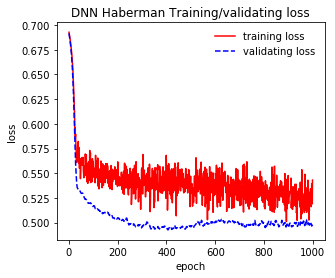

In [12]:
# Summarize history for loss.

plt.ion()

plt.figure('Figure Haberman loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('DNN Haberman Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)
#plt.show()


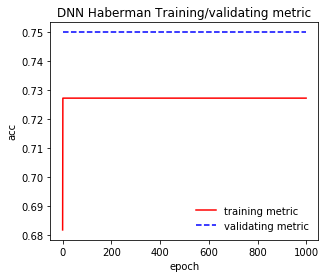

In [13]:
# Summarize history for metric.

plt.figure('Figure Haberman metric', figsize = (4.8, 4.0))
plt.plot(history.history['acc'], "r-")
plt.plot(history.history['val_acc'], "b--")
plt.title('DNN Haberman Training/validating metric')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
#plt.show()